# HighDimBiff Demo

You can run this 
* either on the cluster, by first converting this notebook to a script via ''jupyter nbconvert --to script run_mc.ipynb --template=nbconv.tpl'', then calling it from the command line via a slurm script with an extra argument specifying the amount of processes that can be allocated 
    * the conversion works on all notebook cells that have a tag 'export' (view -> cell toolbar -> tags)
* interactivly on your own computer with this notebook!


In [2]:
if isdefined(:cluster)
    using ClusterManagers
    N_tasks = parse(Int, ARGS[1])
    N_worker = N_tasks 
    addprocs(SlurmManager(N_worker))
    @everywhere include("/p/tmp/maxgelbr/code/HighBifLib.jl/HighBifLib.jl")
else
    #addprocs(1)
    #@everywhere include("HighBifLib.jl")
    import Plots
    #using HighBifLib
end

@everywhere using LSODA
@everywhere using LightGraphs
using JLD2, FileIO, Clustering
@everywhere using DifferentialEquations
@everywhere using Distributions
@everywhere using HighBifLib  

# these imports invoke a lot of warnings when executed with multiple processes
# this seems to me to be more a bug of julia than an actual problem with this code
# imported on a single process there are no warnings

# Example 1: Order Parameter of Kuramoto Osc. 

We vary the initial conditions and the coupling strength. This is just to demonstrate how these kind of experiments are setup

**To-Do/Comment:** I am still very confused why and in which cases the @everywhere is needed. In this case the code doesn't work without any of the everywheres, but this goes against most of the explanations in the documentation.

In [3]:
@everywhere N = 3
@everywhere K = 0.5
@everywhere nd = Normal(0.5, 0.5) # distribution for eigenfrequencies # mean = 0.5Hz, std = 0.5Hz
@everywhere w_i_par = rand(nd,N) 

@everywhere net = erdos_renyi(N, 0.2)
@everywhere A = adjacency_matrix(net)


@everywhere ic = zeros(N)
@everywhere ic_dist = Uniform(-pi,pi)
@everywhere kdist = Uniform(0,10)
@everywhere ic_ranges = [()->rand(ic_dist)]
@everywhere N_ics = 50
#@everywhere ic_ranges = [-pi:pi/2:pi/2 for i=1:N]
#@everywhere K_range = 0.0:1:10.
@everywhere K_range = ()->rand(kdist)
@everywhere pars = kuramoto_network_parameters(K, w_i_par, N, A)

# base problem
@everywhere rp = ODEProblem(kuramoto_network, ic, (0.,100.), pars)

# setup the MC problem with the helper function from the library
@everywhere (ic_coupling_problem, ic_par, N_mc) = setup_ic_par_mc_problem(rp, ic_ranges, N_ics, pars, (:K, K_range))

# for this first example we are only interested in the order parameter of the kuramoto model

# define the MC Problem
ko_mcp = MonteCarloProblem(rp, prob_func=ic_coupling_problem, output_func=eval_ode_run)
tail_frac = 0.9 # 
ko_emcp = EqMCProblem(ko_mcp, N_mc, tail_frac) 
ko_sol = solve(ko_emcp)




-------
1
-------
[43.1533, 43.1661, 43.1788, 43.1916, 43.2043, 43.2171, 43.2298, 43.2426, 43.2553, 43.2681, 43.2808, 43.2936, 43.3063, 43.319, 43.3318, 43.3445, 43.3573, 43.37, 43.3828, 43.3955, 43.4083, 43.421, 43.4338, 43.4465, 43.4593, 43.472, 43.4847, 43.4975, 43.5102, 43.523, 43.5357, 43.5485, 43.5612, 43.574, 43.5867, 43.5995, 43.6122, 43.6249, 43.6377, 43.6504, 43.6632, 43.6759, 43.6887, 43.7014, 43.7142, 43.7269, 43.7397, 43.7524, 43.7652, 43.7779, 43.7906, 43.8034, 43.8161, 43.8289, 43.8416, 43.8544, 43.8671, 43.8799, 43.8926, 43.9054, 43.9181, 43.9309, 43.9436, 43.9563, 43.9691, 43.9818, 43.9946, 44.0073, 44.0201, 44.0328, 44.0456, 44.0583, 44.0711, 44.0838, 44.0965, 44.1093, 44.122, 44.1348, 44.1475, 44.1603, 44.173, 44.1858, 44.1985, 44.2113, 44.224, 44.2368, 44.2495, 44.2622, 44.275, 44.2877, 44.3005, 44.3132, 44.326, 44.3387, 44.3515, 44.3642, 44.377, 44.3897, 44.4024, 44.4152, 44.4279, 44.4407, 44.4534, 44.4662, 44.4789, 44.4917, 44.5044, 44.5172, 44.5299, 44.5427, 44.5

-------
2
-------
[46.505, 46.5178, 46.5305, 46.5433, 46.556, 46.5688, 46.5815, 46.5943, 46.607, 46.6198, 46.6325, 46.6452, 46.658, 46.6707, 46.6835, 46.6962, 46.709, 46.7217, 46.7345, 46.7472, 46.76, 46.7727, 46.7854, 46.7982, 46.8109, 46.8237, 46.8364, 46.8492, 46.8619, 46.8747, 46.8874, 46.9002, 46.9129, 46.9257, 46.9384, 46.9511, 46.9639, 46.9766, 46.9894, 47.0021, 47.0149, 47.0276, 47.0404, 47.0531, 47.0659, 47.0786, 47.0913, 47.1041, 47.1168, 47.1296, 47.1423, 47.1551, 47.1678, 47.1806, 47.1933, 47.2061, 47.2188, 47.2316, 47.2443, 47.257, 47.2698, 47.2825, 47.2953, 47.308, 47.3208, 47.3335, 47.3463, 47.359, 47.3718, 47.3845, 47.3973, 47.41, 47.4227, 47.4355, 47.4482, 47.461, 47.4737, 47.4865, 47.4992, 47.512, 47.5247, 47.5375, 47.5502, 47.5629, 47.5757, 47.5884, 47.6012, 47.6139, 47.6267, 47.6394, 47.6522, 47.6649, 47.6777, 47.6904, 47.7032, 47.7159, 47.7286, 47.7414, 47.7541, 47.7669, 47.7796, 47.7924, 47.8051, 47.8179, 47.8306, 47.8434, 47.8561, 47.8688, 47.8816, 47.8943, 47.90

[3.14259, 3.14432, 3.14604, 3.14776, 3.14949, 3.15121, 3.15294, 3.15466, 3.15639, 3.15811, 3.15983, 3.16156, 3.16328, 3.16501, 3.16673, 3.16846, 3.17018, 3.17191, 3.17363, 3.17535, 3.17708, 3.1788, 3.18053, 3.18225, 3.18398, 3.1857, 3.18742, 3.18915, 3.19087, 3.1926, 3.19432, 3.19605, 3.19777, 3.19949, 3.20122, 3.20294, 3.20467, 3.20639, 3.20812, 3.20984, 3.21157, 3.21329, 3.21501, 3.21674, 3.21846, 3.22019, 3.22191, 3.22364, 3.22536, 3.22708, 3.22881, 3.23053, 3.23226, 3.23398, 3.23571, 3.23743, 3.23915, 3.24088, 3.2426, 3.24433, 3.24605, 3.24778, 3.2495, 3.25122, 3.25295, 3.25467, 3.2564, 3.25812, 3.25985, 3.26157, 3.2633, 3.26502, 3.26674, 3.26847, 3.27019, 3.27192, 3.27364, 3.27537, 3.27709, 3.27881, 3.28054, 3.28226, 3.28399, 3.28571, 3.28744, 3.28916, 3.29088, 3.29261, 3.29433, 3.29606, 3.29778, 3.29951, 3.30123, 3.30296, 3.30468, 3.3064, 3.30813, 3.30985, 3.31158, 3.3133, 3.31503, 3.31675, 3.31847, 3.3202, 3.32192, 3.32365, 3.32537, 3.3271, 3.32882, 3.33054, 3.33227, 3.33399, 3.

-------
3
-------
[5.81302, 5.81475, 5.81647, 5.8182, 5.81992, 5.82165, 5.82337, 5.82509, 5.82682, 5.82854, 5.83027, 5.83199, 5.83372, 5.83544, 5.83717, 5.83889, 5.84061, 5.84234, 5.84406, 5.84579, 5.84751, 5.84924, 5.85096, 5.85268, 5.85441, 5.85613, 5.85786, 5.85958, 5.86131, 5.86303, 5.86475, 5.86648, 5.8682, 5.86993, 5.87165, 5.87338, 5.8751, 5.87683, 5.87855, 5.88027, 5.882, 5.88372, 5.88545, 5.88717, 5.8889, 5.89062, 5.89234, 5.89407, 5.89579, 5.89752, 5.89924, 5.90097, 5.90269, 5.90441, 5.90614, 5.90786, 5.90959, 5.91131, 5.91304, 5.91476, 5.91648, 5.91821, 5.91993, 5.92166, 5.92338, 5.92511, 5.92683, 5.92856, 5.93028, 5.932, 5.93373, 5.93545, 5.93718, 5.9389, 5.94063, 5.94235, 5.94407, 5.9458, 5.94752, 5.94925, 5.95097, 5.9527, 5.95442, 5.95614, 5.95787, 5.95959, 5.96132, 5.96304, 5.96477, 5.96649, 5.96822, 5.96994, 5.97166, 5.97339, 5.97511, 5.97684, 5.97856, 5.98029, 5.98201, 5.98373, 5.98546, 5.98718, 5.98891, 5.99063, 5.99236, 5.99408, 5.9958, 5.99753, 5.99925, 6.00098, 6.0

[6.87213, 6.87383, 6.87554, 6.87725, 6.87896, 6.88066, 6.88237, 6.88409, 6.8858, 6.88751, 6.88922, 6.89094, 6.89265, 6.89437, 6.89609, 6.8978, 6.89952, 6.90124, 6.90297, 6.90469, 6.90641, 6.90814, 6.90986, 6.91159, 6.91332, 6.91505, 6.91678, 6.91851, 6.92024, 6.92198, 6.92371, 6.92545, 6.92719, 6.92893, 6.93067, 6.93242, 6.93416, 6.9359, 6.93764, 6.93939, 6.94113, 6.94288, 6.94462, 6.94637, 6.94811, 6.94986, 6.95161, 6.95335, 6.9551, 6.95685, 6.95859, 6.96034, 6.96209, 6.96384, 6.96559, 6.96734, 6.96908, 6.97083, 6.97258, 6.97433, 6.97608, 6.97783, 6.97958, 6.98133, 6.98308, 6.98483, 6.98658, 6.98833, 6.99008, 6.99184, 6.99359, 6.99534, 6.99709, 6.99884, 7.00059, 7.00234, 7.00409, 7.00584, 7.00759, 7.00934, 7.01109, 7.01285, 7.0146, 7.01635, 7.0181, 7.01985, 7.0216, 7.02335, 7.0251, 7.02685, 7.0286, 7.03035, 7.0321, 7.03385, 7.0356, 7.03735, 7.0391, 7.04085, 7.04259, 7.04434, 7.04609, 7.04784, 7.04959, 7.05134, 7.05308, 7.05483, 7.05658, 7.05833, 7.06007, 7.06182, 7.06357, 7.06531, 7.0

[46.7728, 46.7856, 46.7983, 46.8111, 46.8238, 46.8366, 46.8493, 46.8621, 46.8748, 46.8876, 46.9003, 46.913, 46.9258, 46.9385, 46.9513, 46.964, 46.9768, 46.9895, 47.0023, 47.015, 47.0278, 47.0405, 47.0533, 47.066, 47.0787, 47.0915, 47.1042, 47.117, 47.1297, 47.1425, 47.1552, 47.168, 47.1807, 47.1935, 47.2062, 47.2189, 47.2317, 47.2444, 47.2572, 47.2699, 47.2827, 47.2954, 47.3082, 47.3209, 47.3337, 47.3464, 47.3592, 47.3719, 47.3846, 47.3974, 47.4101, 47.4229, 47.4356, 47.4484, 47.4611, 47.4739, 47.4866, 47.4994, 47.5121, 47.5248, 47.5376, 47.5503, 47.5631, 47.5758, 47.5886, 47.6013, 47.6141, 47.6268, 47.6396, 47.6523, 47.6651, 47.6778, 47.6905, 47.7033, 47.716, 47.7288, 47.7415, 47.7543, 47.767, 47.7798, 47.7925, 47.8053, 47.818, 47.8308, 47.8435, 47.8562, 47.869, 47.8817, 47.8945, 47.9072, 47.92, 47.9327, 47.9455, 47.9582, 47.971, 47.9837, 47.9964, 48.0092, 48.0219, 48.0347, 48.0474, 48.0602, 48.0729, 48.0857, 48.0984, 48.1112, 48.1239, 48.1367, 48.1494, 48.1621, 48.1749, 48.1876, 48.2

[8.56759, 8.56931, 8.57103, 8.57276, 8.57448, 8.57621, 8.57793, 8.57966, 8.58138, 8.5831, 8.58483, 8.58655, 8.58828, 8.59, 8.59173, 8.59345, 8.59518, 8.5969, 8.59862, 8.60035, 8.60207, 8.6038, 8.60552, 8.60725, 8.60897, 8.61069, 8.61242, 8.61414, 8.61587, 8.61759, 8.61932, 8.62104, 8.62276, 8.62449, 8.62621, 8.62794, 8.62966, 8.63139, 8.63311, 8.63483, 8.63656, 8.63828, 8.64001, 8.64173, 8.64346, 8.64518, 8.64691, 8.64863, 8.65035, 8.65208, 8.6538, 8.65553, 8.65725, 8.65898, 8.6607, 8.66242, 8.66415, 8.66587, 8.6676, 8.66932, 8.67105, 8.67277, 8.67449, 8.67622, 8.67794, 8.67967, 8.68139, 8.68312, 8.68484, 8.68657, 8.68829, 8.69001, 8.69174, 8.69346, 8.69519, 8.69691, 8.69864, 8.70036, 8.70208, 8.70381, 8.70553, 8.70726, 8.70898, 8.71071, 8.71243, 8.71415, 8.71588, 8.7176, 8.71933, 8.72105, 8.72278, 8.7245, 8.72622, 8.72795, 8.72967, 8.7314, 8.73312, 8.73485, 8.73657, 8.7383, 8.74002, 8.74174, 8.74347, 8.74519, 8.74692, 8.74864, 8.75037, 8.75209, 8.75381, 8.75554, 8.75726, 8.75899, 8.76

[6.70848, 6.71021, 6.71193, 6.71366, 6.71538, 6.71711, 6.71883, 6.72055, 6.72228, 6.724, 6.72573, 6.72745, 6.72918, 6.7309, 6.73262, 6.73435, 6.73607, 6.7378, 6.73952, 6.74125, 6.74297, 6.7447, 6.74642, 6.74814, 6.74987, 6.75159, 6.75332, 6.75504, 6.75677, 6.75849, 6.76021, 6.76194, 6.76366, 6.76539, 6.76711, 6.76884, 6.77056, 6.77228, 6.77401, 6.77573, 6.77746, 6.77918, 6.78091, 6.78263, 6.78435, 6.78608, 6.7878, 6.78953, 6.79125, 6.79298, 6.7947, 6.79643, 6.79815, 6.79987, 6.8016, 6.80332, 6.80505, 6.80677, 6.8085, 6.81022, 6.81194, 6.81367, 6.81539, 6.81712, 6.81884, 6.82057, 6.82229, 6.82401, 6.82574, 6.82746, 6.82919, 6.83091, 6.83264, 6.83436, 6.83609, 6.83781, 6.83953, 6.84126, 6.84298, 6.84471, 6.84643, 6.84816, 6.84988, 6.8516, 6.85333, 6.85505, 6.85678, 6.8585, 6.86023, 6.86195, 6.86367, 6.8654, 6.86712, 6.86885, 6.87057, 6.8723, 6.87402, 6.87574, 6.87747, 6.87919, 6.88092, 6.88264, 6.88437, 6.88609, 6.88782, 6.88954, 6.89126, 6.89299, 6.89471, 6.89644, 6.89816, 6.89989, 6.90

[47.4443, 47.4571, 47.4698, 47.4825, 47.4953, 47.508, 47.5208, 47.5335, 47.5463, 47.559, 47.5718, 47.5845, 47.5973, 47.61, 47.6227, 47.6355, 47.6482, 47.661, 47.6737, 47.6865, 47.6992, 47.712, 47.7247, 47.7375, 47.7502, 47.763, 47.7757, 47.7884, 47.8012, 47.8139, 47.8267, 47.8394, 47.8522, 47.8649, 47.8777, 47.8904, 47.9032, 47.9159, 47.9287, 47.9414, 47.9541, 47.9669, 47.9796, 47.9924, 48.0051, 48.0179, 48.0306, 48.0434, 48.0561, 48.0689, 48.0816, 48.0943, 48.1071, 48.1198, 48.1326, 48.1453, 48.1581, 48.1708, 48.1836, 48.1963, 48.2091, 48.2218, 48.2346, 48.2473, 48.26, 48.2728, 48.2855, 48.2983, 48.311, 48.3238, 48.3365, 48.3493, 48.362, 48.3748, 48.3875, 48.4002, 48.413, 48.4257, 48.4385, 48.4512, 48.464, 48.4767, 48.4895, 48.5022, 48.515, 48.5277, 48.5405, 48.5532, 48.5659, 48.5787, 48.5914, 48.6042, 48.6169, 48.6297, 48.6424, 48.6552, 48.6679, 48.6807, 48.6934, 48.7062, 48.7189, 48.7316, 48.7444, 48.7571, 48.7699, 48.7826, 48.7954, 48.8081, 48.8209, 48.8336, 48.8464, 48.8591, 48.87

[6.38065, 6.38238, 6.3841, 6.38583, 6.38755, 6.38928, 6.391, 6.39272, 6.39445, 6.39617, 6.3979, 6.39962, 6.40135, 6.40307, 6.40479, 6.40652, 6.40824, 6.40997, 6.41169, 6.41342, 6.41514, 6.41687, 6.41859, 6.42031, 6.42204, 6.42376, 6.42549, 6.42721, 6.42894, 6.43066, 6.43238, 6.43411, 6.43583, 6.43756, 6.43928, 6.44101, 6.44273, 6.44445, 6.44618, 6.4479, 6.44963, 6.45135, 6.45308, 6.4548, 6.45652, 6.45825, 6.45997, 6.4617, 6.46342, 6.46515, 6.46687, 6.4686, 6.47032, 6.47204, 6.47377, 6.47549, 6.47722, 6.47894, 6.48067, 6.48239, 6.48411, 6.48584, 6.48756, 6.48929, 6.49101, 6.49274, 6.49446, 6.49618, 6.49791, 6.49963, 6.50136, 6.50308, 6.50481, 6.50653, 6.50825, 6.50998, 6.5117, 6.51343, 6.51515, 6.51688, 6.5186, 6.52033, 6.52205, 6.52377, 6.5255, 6.52722, 6.52895, 6.53067, 6.5324, 6.53412, 6.53584, 6.53757, 6.53929, 6.54102, 6.54274, 6.54447, 6.54619, 6.54791, 6.54964, 6.55136, 6.55309, 6.55481, 6.55654, 6.55826, 6.55999, 6.56171, 6.56343, 6.56516, 6.56688, 6.56861, 6.57033, 6.57206, 6.5

[4.10951, 4.11123, 4.11296, 4.11468, 4.11641, 4.11813, 4.11985, 4.12158, 4.1233, 4.12503, 4.12675, 4.12848, 4.1302, 4.13192, 4.13365, 4.13537, 4.1371, 4.13882, 4.14055, 4.14227, 4.144, 4.14572, 4.14744, 4.14917, 4.15089, 4.15262, 4.15434, 4.15607, 4.15779, 4.15951, 4.16124, 4.16296, 4.16469, 4.16641, 4.16814, 4.16986, 4.17158, 4.17331, 4.17503, 4.17676, 4.17848, 4.18021, 4.18193, 4.18365, 4.18538, 4.1871, 4.18883, 4.19055, 4.19228, 4.194, 4.19573, 4.19745, 4.19917, 4.2009, 4.20262, 4.20435, 4.20607, 4.2078, 4.20952, 4.21124, 4.21297, 4.21469, 4.21642, 4.21814, 4.21987, 4.22159, 4.22331, 4.22504, 4.22676, 4.22849, 4.23021, 4.23194, 4.23366, 4.23539, 4.23711, 4.23883, 4.24056, 4.24228, 4.24401, 4.24573, 4.24746, 4.24918, 4.2509, 4.25263, 4.25435, 4.25608, 4.2578, 4.25953, 4.26125, 4.26297, 4.2647, 4.26642, 4.26815, 4.26987, 4.2716, 4.27332, 4.27504, 4.27677, 4.27849, 4.28022, 4.28194, 4.28367, 4.28539, 4.28712, 4.28884, 4.29056, 4.29229, 4.29401, 4.29574, 4.29746, 4.29919, 4.30091, 4.302

[47.6404, 47.6531, 47.6659, 47.6786, 47.6914, 47.7041, 47.7168, 47.7296, 47.7423, 47.7551, 47.7678, 47.7806, 47.7933, 47.8061, 47.8188, 47.8316, 47.8443, 47.8571, 47.8698, 47.8825, 47.8953, 47.908, 47.9208, 47.9335, 47.9463, 47.959, 47.9718, 47.9845, 47.9973, 48.01, 48.0227, 48.0355, 48.0482, 48.061, 48.0737, 48.0865, 48.0992, 48.112, 48.1247, 48.1375, 48.1502, 48.163, 48.1757, 48.1884, 48.2012, 48.2139, 48.2267, 48.2394, 48.2522, 48.2649, 48.2777, 48.2904, 48.3032, 48.3159, 48.3287, 48.3414, 48.3541, 48.3669, 48.3796, 48.3924, 48.4051, 48.4179, 48.4306, 48.4434, 48.4561, 48.4689, 48.4816, 48.4943, 48.5071, 48.5198, 48.5326, 48.5453, 48.5581, 48.5708, 48.5836, 48.5963, 48.6091, 48.6218, 48.6346, 48.6473, 48.66, 48.6728, 48.6855, 48.6983, 48.711, 48.7238, 48.7365, 48.7493, 48.762, 48.7748, 48.7875, 48.8002, 48.813, 48.8257, 48.8385, 48.8512, 48.864, 48.8767, 48.8895, 48.9022, 48.915, 48.9277, 48.9405, 48.9532, 48.9659, 48.9787, 48.9914, 49.0042, 49.0169, 49.0297, 49.0424, 49.0552, 49.06

[7.75154, 7.75326, 7.75499, 7.75671, 7.75844, 7.76016, 7.76189, 7.76361, 7.76534, 7.76706, 7.76878, 7.77051, 7.77223, 7.77396, 7.77568, 7.77741, 7.77913, 7.78085, 7.78258, 7.7843, 7.78603, 7.78775, 7.78948, 7.7912, 7.79292, 7.79465, 7.79637, 7.7981, 7.79982, 7.80155, 7.80327, 7.80499, 7.80672, 7.80844, 7.81017, 7.81189, 7.81362, 7.81534, 7.81707, 7.81879, 7.82051, 7.82224, 7.82396, 7.82569, 7.82741, 7.82914, 7.83086, 7.83258, 7.83431, 7.83603, 7.83776, 7.83948, 7.84121, 7.84293, 7.84465, 7.84638, 7.8481, 7.84983, 7.85155, 7.85328, 7.855, 7.85672, 7.85845, 7.86017, 7.8619, 7.86362, 7.86535, 7.86707, 7.8688, 7.87052, 7.87224, 7.87397, 7.87569, 7.87742, 7.87914, 7.88087, 7.88259, 7.88431, 7.88604, 7.88776, 7.88949, 7.89121, 7.89294, 7.89466, 7.89638, 7.89811, 7.89983, 7.90156, 7.90328, 7.90501, 7.90673, 7.90846, 7.91018, 7.9119, 7.91363, 7.91535, 7.91708, 7.9188, 7.92053, 7.92225, 7.92397, 7.9257, 7.92742, 7.92915, 7.93087, 7.9326, 7.93432, 7.93604, 7.93777, 7.93949, 7.94122, 7.94294, 7.9

[2.89503, 2.89675, 2.89848, 2.9002, 2.90193, 2.90365, 2.90537, 2.9071, 2.90882, 2.91055, 2.91227, 2.914, 2.91572, 2.91744, 2.91917, 2.92089, 2.92262, 2.92434, 2.92607, 2.92779, 2.92951, 2.93124, 2.93296, 2.93469, 2.93641, 2.93814, 2.93986, 2.94159, 2.94331, 2.94503, 2.94676, 2.94848, 2.95021, 2.95193, 2.95366, 2.95538, 2.9571, 2.95883, 2.96055, 2.96228, 2.964, 2.96573, 2.96745, 2.96917, 2.9709, 2.97262, 2.97435, 2.97607, 2.9778, 2.97952, 2.98124, 2.98297, 2.98469, 2.98642, 2.98814, 2.98987, 2.99159, 2.99332, 2.99504, 2.99676, 2.99849, 3.00021, 3.00194, 3.00366, 3.00539, 3.00711, 3.00883, 3.01056, 3.01228, 3.01401, 3.01573, 3.01746, 3.01918, 3.0209, 3.02263, 3.02435, 3.02608, 3.0278, 3.02953, 3.03125, 3.03298, 3.0347, 3.03642, 3.03815, 3.03987, 3.0416, 3.04332, 3.04505, 3.04677, 3.04849, 3.05022, 3.05194, 3.05367, 3.05539, 3.05712, 3.05884, 3.06056, 3.06229, 3.06401, 3.06574, 3.06746, 3.06919, 3.07091, 3.07263, 3.07436, 3.07608, 3.07781, 3.07953, 3.08126, 3.08298, 3.08471, 3.08643, 3.08

[47.9728, 47.9855, 47.9983, 48.011, 48.0238, 48.0365, 48.0493, 48.062, 48.0748, 48.0875, 48.1003, 48.113, 48.1257, 48.1385, 48.1512, 48.164, 48.1767, 48.1895, 48.2022, 48.215, 48.2277, 48.2405, 48.2532, 48.266, 48.2787, 48.2914, 48.3042, 48.3169, 48.3297, 48.3424, 48.3552, 48.3679, 48.3807, 48.3934, 48.4062, 48.4189, 48.4317, 48.4444, 48.4571, 48.4699, 48.4826, 48.4954, 48.5081, 48.5209, 48.5336, 48.5464, 48.5591, 48.5719, 48.5846, 48.5973, 48.6101, 48.6228, 48.6356, 48.6483, 48.6611, 48.6738, 48.6866, 48.6993, 48.7121, 48.7248, 48.7376, 48.7503, 48.763, 48.7758, 48.7885, 48.8013, 48.814, 48.8268, 48.8395, 48.8523, 48.865, 48.8778, 48.8905, 48.9032, 48.916, 48.9287, 48.9415, 48.9542, 48.967, 48.9797, 48.9925, 49.0052, 49.018, 49.0307, 49.0435, 49.0562, 49.0689, 49.0817, 49.0944, 49.1072, 49.1199, 49.1327, 49.1454, 49.1582, 49.1709, 49.1837, 49.1964, 49.2092, 49.2219, 49.2346, 49.2474, 49.2601, 49.2729, 49.2856, 49.2984, 49.3111, 49.3239, 49.3366, 49.3494, 49.3621, 49.3748, 49.3876, 49.

-------
12
-------
[43.8061, 43.8188, 43.8316, 43.8443, 43.857, 43.8698, 43.8825, 43.8953, 43.908, 43.9208, 43.9335, 43.9463, 43.959, 43.9718, 43.9845, 43.9973, 44.01, 44.0227, 44.0355, 44.0482, 44.061, 44.0737, 44.0865, 44.0992, 44.112, 44.1247, 44.1375, 44.1502, 44.163, 44.1757, 44.1884, 44.2012, 44.2139, 44.2267, 44.2394, 44.2522, 44.2649, 44.2777, 44.2904, 44.3032, 44.3159, 44.3286, 44.3414, 44.3541, 44.3669, 44.3796, 44.3924, 44.4051, 44.4179, 44.4306, 44.4434, 44.4561, 44.4689, 44.4816, 44.4943, 44.5071, 44.5198, 44.5326, 44.5453, 44.5581, 44.5708, 44.5836, 44.5963, 44.6091, 44.6218, 44.6346, 44.6473, 44.66, 44.6728, 44.6855, 44.6983, 44.711, 44.7238, 44.7365, 44.7493, 44.762, 44.7748, 44.7875, 44.8002, 44.813, 44.8257, 44.8385, 44.8512, 44.864, 44.8767, 44.8895, 44.9022, 44.915, 44.9277, 44.9405, 44.9532, 44.9659, 44.9787, 44.9914, 45.0042, 45.0169, 45.0297, 45.0424, 45.0552, 45.0679, 45.0807, 45.0934, 45.1061, 45.1189, 45.1316, 45.1444, 45.1571, 45.1699, 45.1826, 45.1954, 45.20

[5.93823, 5.93995, 5.94168, 5.9434, 5.94513, 5.94685, 5.94858, 5.9503, 5.95202, 5.95375, 5.95547, 5.9572, 5.95892, 5.96065, 5.96237, 5.96409, 5.96582, 5.96754, 5.96927, 5.97099, 5.97272, 5.97444, 5.97616, 5.97789, 5.97961, 5.98134, 5.98306, 5.98479, 5.98651, 5.98824, 5.98996, 5.99168, 5.99341, 5.99513, 5.99686, 5.99858, 6.00031, 6.00203, 6.00375, 6.00548, 6.0072, 6.00893, 6.01065, 6.01238, 6.0141, 6.01582, 6.01755, 6.01927, 6.021, 6.02272, 6.02445, 6.02617, 6.02789, 6.02962, 6.03134, 6.03307, 6.03479, 6.03652, 6.03824, 6.03997, 6.04169, 6.04341, 6.04514, 6.04686, 6.04859, 6.05031, 6.05204, 6.05376, 6.05548, 6.05721, 6.05893, 6.06066, 6.06238, 6.06411, 6.06583, 6.06755, 6.06928, 6.071, 6.07273, 6.07445, 6.07618, 6.0779, 6.07963, 6.08135, 6.08307, 6.0848, 6.08652, 6.08825, 6.08997, 6.0917, 6.09342, 6.09514, 6.09687, 6.09859, 6.10032, 6.10204, 6.10377, 6.10549, 6.10721, 6.10894, 6.11066, 6.11239, 6.11411, 6.11584, 6.11756, 6.11928, 6.12101, 6.12273, 6.12446, 6.12618, 6.12791, 6.12963, 6.1

[6.79468, 6.79643, 6.79819, 6.79994, 6.80169, 6.80344, 6.8052, 6.80695, 6.8087, 6.81045, 6.8122, 6.81395, 6.8157, 6.81746, 6.81921, 6.82096, 6.82271, 6.82446, 6.82621, 6.82796, 6.82971, 6.83146, 6.83321, 6.83496, 6.83671, 6.83846, 6.84021, 6.84196, 6.84371, 6.84546, 6.84721, 6.84896, 6.8507, 6.85245, 6.8542, 6.85595, 6.8577, 6.85945, 6.86119, 6.86294, 6.86469, 6.86644, 6.86819, 6.86993, 6.87168, 6.87343, 6.87517, 6.87692, 6.87867, 6.88041, 6.88216, 6.88391, 6.88565, 6.8874, 6.88914, 6.89089, 6.89264, 6.89438, 6.89613, 6.89787, 6.89962, 6.90136, 6.90311, 6.90485, 6.9066, 6.90834, 6.91009, 6.91183, 6.91357, 6.91532, 6.91706, 6.91881, 6.92055, 6.92229, 6.92404, 6.92578, 6.92752, 6.92927, 6.93101, 6.93275, 6.93449, 6.93624, 6.93798, 6.93972, 6.94146, 6.9432, 6.94495, 6.94669, 6.94843, 6.95017, 6.95191, 6.95365, 6.95539, 6.95714, 6.95888, 6.96062, 6.96236, 6.9641, 6.96584, 6.96758, 6.96932, 6.97106, 6.9728, 6.97454, 6.97628, 6.97802, 6.97976, 6.9815, 6.98323, 6.98497, 6.98671, 6.98845, 6.99

[42.8326, 42.8454, 42.8581, 42.8709, 42.8836, 42.8964, 42.9091, 42.9218, 42.9346, 42.9473, 42.9601, 42.9728, 42.9856, 42.9983, 43.0111, 43.0238, 43.0366, 43.0493, 43.0621, 43.0748, 43.0875, 43.1003, 43.113, 43.1258, 43.1385, 43.1513, 43.164, 43.1768, 43.1895, 43.2023, 43.215, 43.2277, 43.2405, 43.2532, 43.266, 43.2787, 43.2915, 43.3042, 43.317, 43.3297, 43.3425, 43.3552, 43.368, 43.3807, 43.3934, 43.4062, 43.4189, 43.4317, 43.4444, 43.4572, 43.4699, 43.4827, 43.4954, 43.5082, 43.5209, 43.5337, 43.5464, 43.5591, 43.5719, 43.5846, 43.5974, 43.6101, 43.6229, 43.6356, 43.6484, 43.6611, 43.6739, 43.6866, 43.6993, 43.7121, 43.7248, 43.7376, 43.7503, 43.7631, 43.7758, 43.7886, 43.8013, 43.8141, 43.8268, 43.8396, 43.8523, 43.865, 43.8778, 43.8905, 43.9033, 43.916, 43.9288, 43.9415, 43.9543, 43.967, 43.9798, 43.9925, 44.0052, 44.018, 44.0307, 44.0435, 44.0562, 44.069, 44.0817, 44.0945, 44.1072, 44.12, 44.1327, 44.1455, 44.1582, 44.1709, 44.1837, 44.1964, 44.2092, 44.2219, 44.2347, 44.2474, 44.2

[8.74188, 8.7436, 8.74533, 8.74705, 8.74877, 8.7505, 8.75222, 8.75395, 8.75567, 8.7574, 8.75912, 8.76084, 8.76257, 8.76429, 8.76602, 8.76774, 8.76947, 8.77119, 8.77292, 8.77464, 8.77636, 8.77809, 8.77981, 8.78154, 8.78326, 8.78499, 8.78671, 8.78843, 8.79016, 8.79188, 8.79361, 8.79533, 8.79706, 8.79878, 8.8005, 8.80223, 8.80395, 8.80568, 8.8074, 8.80913, 8.81085, 8.81257, 8.8143, 8.81602, 8.81775, 8.81947, 8.8212, 8.82292, 8.82465, 8.82637, 8.82809, 8.82982, 8.83154, 8.83327, 8.83499, 8.83672, 8.83844, 8.84016, 8.84189, 8.84361, 8.84534, 8.84706, 8.84879, 8.85051, 8.85223, 8.85396, 8.85568, 8.85741, 8.85913, 8.86086, 8.86258, 8.86431, 8.86603, 8.86775, 8.86948, 8.8712, 8.87293, 8.87465, 8.87638, 8.8781, 8.87982, 8.88155, 8.88327, 8.885, 8.88672, 8.88845, 8.89017, 8.89189, 8.89362, 8.89534, 8.89707, 8.89879, 8.90052, 8.90224, 8.90396, 8.90569, 8.90741, 8.90914, 8.91086, 8.91259, 8.91431, 8.91604, 8.91776, 8.91948, 8.92121, 8.92293, 8.92466, 8.92638, 8.92811, 8.92983, 8.93155, 8.93328, 8.

[5.85065, 5.85238, 5.8541, 5.85583, 5.85755, 5.85927, 5.861, 5.86272, 5.86445, 5.86617, 5.8679, 5.86962, 5.87134, 5.87307, 5.87479, 5.87652, 5.87824, 5.87997, 5.88169, 5.88341, 5.88514, 5.88686, 5.88859, 5.89031, 5.89204, 5.89376, 5.89549, 5.89721, 5.89893, 5.90066, 5.90238, 5.90411, 5.90583, 5.90756, 5.90928, 5.911, 5.91273, 5.91445, 5.91618, 5.9179, 5.91963, 5.92135, 5.92307, 5.9248, 5.92652, 5.92825, 5.92997, 5.9317, 5.93342, 5.93514, 5.93687, 5.93859, 5.94032, 5.94204, 5.94377, 5.94549, 5.94722, 5.94894, 5.95066, 5.95239, 5.95411, 5.95584, 5.95756, 5.95929, 5.96101, 5.96273, 5.96446, 5.96618, 5.96791, 5.96963, 5.97136, 5.97308, 5.9748, 5.97653, 5.97825, 5.97998, 5.9817, 5.98343, 5.98515, 5.98687, 5.9886, 5.99032, 5.99205, 5.99377, 5.9955, 5.99722, 5.99895, 6.00067, 6.00239, 6.00412, 6.00584, 6.00757, 6.00929, 6.01102, 6.01274, 6.01446, 6.01619, 6.01791, 6.01964, 6.02136, 6.02309, 6.02481, 6.02653, 6.02826, 6.02998, 6.03171, 6.03343, 6.03516, 6.03688, 6.03861, 6.04033, 6.04205, 6.04

[45.5933, 45.606, 45.6188, 45.6315, 45.6443, 45.657, 45.6698, 45.6825, 45.6953, 45.708, 45.7207, 45.7335, 45.7462, 45.759, 45.7717, 45.7845, 45.7972, 45.81, 45.8227, 45.8355, 45.8482, 45.8609, 45.8737, 45.8864, 45.8992, 45.9119, 45.9247, 45.9374, 45.9502, 45.9629, 45.9757, 45.9884, 46.0012, 46.0139, 46.0266, 46.0394, 46.0521, 46.0649, 46.0776, 46.0904, 46.1031, 46.1159, 46.1286, 46.1414, 46.1541, 46.1669, 46.1796, 46.1923, 46.2051, 46.2178, 46.2306, 46.2433, 46.2561, 46.2688, 46.2816, 46.2943, 46.3071, 46.3198, 46.3325, 46.3453, 46.358, 46.3708, 46.3835, 46.3963, 46.409, 46.4218, 46.4345, 46.4473, 46.46, 46.4728, 46.4855, 46.4982, 46.511, 46.5237, 46.5365, 46.5492, 46.562, 46.5747, 46.5875, 46.6002, 46.613, 46.6257, 46.6384, 46.6512, 46.6639, 46.6767, 46.6894, 46.7022, 46.7149, 46.7277, 46.7404, 46.7532, 46.7659, 46.7787, 46.7914, 46.8041, 46.8169, 46.8296, 46.8424, 46.8551, 46.8679, 46.8806, 46.8934, 46.9061, 46.9189, 46.9316, 46.9444, 46.9571, 46.9698, 46.9826, 46.9953, 47.0081, 47.0

[8.10383, 8.10555, 8.10727, 8.109, 8.11072, 8.11245, 8.11417, 8.1159, 8.11762, 8.11935, 8.12107, 8.12279, 8.12452, 8.12624, 8.12797, 8.12969, 8.13142, 8.13314, 8.13486, 8.13659, 8.13831, 8.14004, 8.14176, 8.14349, 8.14521, 8.14693, 8.14866, 8.15038, 8.15211, 8.15383, 8.15556, 8.15728, 8.15901, 8.16073, 8.16245, 8.16418, 8.1659, 8.16763, 8.16935, 8.17108, 8.1728, 8.17452, 8.17625, 8.17797, 8.1797, 8.18142, 8.18315, 8.18487, 8.18659, 8.18832, 8.19004, 8.19177, 8.19349, 8.19522, 8.19694, 8.19866, 8.20039, 8.20211, 8.20384, 8.20556, 8.20729, 8.20901, 8.21074, 8.21246, 8.21418, 8.21591, 8.21763, 8.21936, 8.22108, 8.22281, 8.22453, 8.22625, 8.22798, 8.2297, 8.23143, 8.23315, 8.23488, 8.2366, 8.23832, 8.24005, 8.24177, 8.2435, 8.24522, 8.24695, 8.24867, 8.2504, 8.25212, 8.25384, 8.25557, 8.25729, 8.25902, 8.26074, 8.26247, 8.26419, 8.26591, 8.26764, 8.26936, 8.27109, 8.27281, 8.27454, 8.27626, 8.27798, 8.27971, 8.28143, 8.28316, 8.28488, 8.28661, 8.28833, 8.29005, 8.29178, 8.2935, 8.29523, 8.

[4.45944, 4.46117, 4.46289, 4.46461, 4.46634, 4.46806, 4.46979, 4.47151, 4.47324, 4.47496, 4.47668, 4.47841, 4.48013, 4.48186, 4.48358, 4.48531, 4.48703, 4.48875, 4.49048, 4.4922, 4.49393, 4.49565, 4.49738, 4.4991, 4.50082, 4.50255, 4.50427, 4.506, 4.50772, 4.50945, 4.51117, 4.5129, 4.51462, 4.51634, 4.51807, 4.51979, 4.52152, 4.52324, 4.52497, 4.52669, 4.52841, 4.53014, 4.53186, 4.53359, 4.53531, 4.53704, 4.53876, 4.54048, 4.54221, 4.54393, 4.54566, 4.54738, 4.54911, 4.55083, 4.55256, 4.55428, 4.556, 4.55773, 4.55945, 4.56118, 4.5629, 4.56463, 4.56635, 4.56807, 4.5698, 4.57152, 4.57325, 4.57497, 4.5767, 4.57842, 4.58014, 4.58187, 4.58359, 4.58532, 4.58704, 4.58877, 4.59049, 4.59221, 4.59394, 4.59566, 4.59739, 4.59911, 4.60084, 4.60256, 4.60429, 4.60601, 4.60773, 4.60946, 4.61118, 4.61291, 4.61463, 4.61636, 4.61808, 4.6198, 4.62153, 4.62325, 4.62498, 4.6267, 4.62843, 4.63015, 4.63187, 4.6336, 4.63532, 4.63705, 4.63877, 4.6405, 4.64222, 4.64395, 4.64567, 4.64739, 4.64912, 4.65084, 4.652

[45.9165, 45.9292, 45.942, 45.9547, 45.9674, 45.9802, 45.9929, 46.0057, 46.0184, 46.0312, 46.0439, 46.0567, 46.0694, 46.0822, 46.0949, 46.1076, 46.1204, 46.1331, 46.1459, 46.1586, 46.1714, 46.1841, 46.1969, 46.2096, 46.2224, 46.2351, 46.2479, 46.2606, 46.2733, 46.2861, 46.2988, 46.3116, 46.3243, 46.3371, 46.3498, 46.3626, 46.3753, 46.3881, 46.4008, 46.4136, 46.4263, 46.439, 46.4518, 46.4645, 46.4773, 46.49, 46.5028, 46.5155, 46.5283, 46.541, 46.5538, 46.5665, 46.5792, 46.592, 46.6047, 46.6175, 46.6302, 46.643, 46.6557, 46.6685, 46.6812, 46.694, 46.7067, 46.7195, 46.7322, 46.7449, 46.7577, 46.7704, 46.7832, 46.7959, 46.8087, 46.8214, 46.8342, 46.8469, 46.8597, 46.8724, 46.8851, 46.8979, 46.9106, 46.9234, 46.9361, 46.9489, 46.9616, 46.9744, 46.9871, 46.9999, 47.0126, 47.0254, 47.0381, 47.0508, 47.0636, 47.0763, 47.0891, 47.1018, 47.1146, 47.1273, 47.1401, 47.1528, 47.1656, 47.1783, 47.1911, 47.2038, 47.2165, 47.2293, 47.242, 47.2548, 47.2675, 47.2803, 47.293, 47.3058, 47.3185, 47.3313, 4

[7.27867, 7.2804, 7.28212, 7.28385, 7.28557, 7.2873, 7.28902, 7.29074, 7.29247, 7.29419, 7.29592, 7.29764, 7.29937, 7.30109, 7.30282, 7.30454, 7.30626, 7.30799, 7.30971, 7.31144, 7.31316, 7.31489, 7.31661, 7.31833, 7.32006, 7.32178, 7.32351, 7.32523, 7.32696, 7.32868, 7.3304, 7.33213, 7.33385, 7.33558, 7.3373, 7.33903, 7.34075, 7.34247, 7.3442, 7.34592, 7.34765, 7.34937, 7.3511, 7.35282, 7.35455, 7.35627, 7.35799, 7.35972, 7.36144, 7.36317, 7.36489, 7.36662, 7.36834, 7.37006, 7.37179, 7.37351, 7.37524, 7.37696, 7.37869, 7.38041, 7.38213, 7.38386, 7.38558, 7.38731, 7.38903, 7.39076, 7.39248, 7.3942, 7.39593, 7.39765, 7.39938, 7.4011, 7.40283, 7.40455, 7.40628, 7.408, 7.40972, 7.41145, 7.41317, 7.4149, 7.41662, 7.41835, 7.42007, 7.42179, 7.42352, 7.42524, 7.42697, 7.42869, 7.43042, 7.43214, 7.43386, 7.43559, 7.43731, 7.43904, 7.44076, 7.44249, 7.44421, 7.44594, 7.44766, 7.44938, 7.45111, 7.45283, 7.45456, 7.45628, 7.45801, 7.45973, 7.46145, 7.46318, 7.4649, 7.46663, 7.46835, 7.47008, 7.4

[8.02735, 8.02908, 8.0308, 8.03253, 8.03425, 8.03598, 8.0377, 8.03942, 8.04115, 8.04287, 8.0446, 8.04632, 8.04805, 8.04977, 8.0515, 8.05322, 8.05494, 8.05667, 8.05839, 8.06012, 8.06184, 8.06357, 8.06529, 8.06701, 8.06874, 8.07046, 8.07219, 8.07391, 8.07564, 8.07736, 8.07908, 8.08081, 8.08253, 8.08426, 8.08598, 8.08771, 8.08943, 8.09115, 8.09288, 8.0946, 8.09633, 8.09805, 8.09978, 8.1015, 8.10323, 8.10495, 8.10667, 8.1084, 8.11012, 8.11185, 8.11357, 8.1153, 8.11702, 8.11874, 8.12047, 8.12219, 8.12392, 8.12564, 8.12737, 8.12909, 8.13081, 8.13254, 8.13426, 8.13599, 8.13771, 8.13944, 8.14116, 8.14289, 8.14461, 8.14633, 8.14806, 8.14978, 8.15151, 8.15323, 8.15496, 8.15668, 8.1584, 8.16013, 8.16185, 8.16358, 8.1653, 8.16703, 8.16875, 8.17047, 8.1722, 8.17392, 8.17565, 8.17737, 8.1791, 8.18082, 8.18254, 8.18427, 8.18599, 8.18772, 8.18944, 8.19117, 8.19289, 8.19462, 8.19634, 8.19806, 8.19979, 8.20151, 8.20324, 8.20496, 8.20669, 8.20841, 8.21013, 8.21186, 8.21358, 8.21531, 8.21703, 8.21876, 8.2

[46.7597, 46.7724, 46.7852, 46.7979, 46.8107, 46.8234, 46.8362, 46.8489, 46.8617, 46.8744, 46.8872, 46.8999, 46.9127, 46.9254, 46.9381, 46.9509, 46.9636, 46.9764, 46.9891, 47.0019, 47.0146, 47.0274, 47.0401, 47.0529, 47.0656, 47.0783, 47.0911, 47.1038, 47.1166, 47.1293, 47.1421, 47.1548, 47.1676, 47.1803, 47.1931, 47.2058, 47.2186, 47.2313, 47.244, 47.2568, 47.2695, 47.2823, 47.295, 47.3078, 47.3205, 47.3333, 47.346, 47.3588, 47.3715, 47.3843, 47.397, 47.4097, 47.4225, 47.4352, 47.448, 47.4607, 47.4735, 47.4862, 47.499, 47.5117, 47.5245, 47.5372, 47.5499, 47.5627, 47.5754, 47.5882, 47.6009, 47.6137, 47.6264, 47.6392, 47.6519, 47.6647, 47.6774, 47.6902, 47.7029, 47.7156, 47.7284, 47.7411, 47.7539, 47.7666, 47.7794, 47.7921, 47.8049, 47.8176, 47.8304, 47.8431, 47.8558, 47.8686, 47.8813, 47.8941, 47.9068, 47.9196, 47.9323, 47.9451, 47.9578, 47.9706, 47.9833, 47.9961, 48.0088, 48.0215, 48.0343, 48.047, 48.0598, 48.0725, 48.0853, 48.098, 48.1108, 48.1235, 48.1363, 48.149, 48.1618, 48.1745, 

[5.37392, 5.37565, 5.37737, 5.3791, 5.38082, 5.38255, 5.38427, 5.38599, 5.38772, 5.38944, 5.39117, 5.39289, 5.39462, 5.39634, 5.39806, 5.39979, 5.40151, 5.40324, 5.40496, 5.40669, 5.40841, 5.41013, 5.41186, 5.41358, 5.41531, 5.41703, 5.41876, 5.42048, 5.4222, 5.42393, 5.42565, 5.42738, 5.4291, 5.43083, 5.43255, 5.43428, 5.436, 5.43772, 5.43945, 5.44117, 5.4429, 5.44462, 5.44635, 5.44807, 5.44979, 5.45152, 5.45324, 5.45497, 5.45669, 5.45842, 5.46014, 5.46186, 5.46359, 5.46531, 5.46704, 5.46876, 5.47049, 5.47221, 5.47394, 5.47566, 5.47738, 5.47911, 5.48083, 5.48256, 5.48428, 5.48601, 5.48773, 5.48945, 5.49118, 5.4929, 5.49463, 5.49635, 5.49808, 5.4998, 5.50152, 5.50325, 5.50497, 5.5067, 5.50842, 5.51015, 5.51187, 5.51359, 5.51532, 5.51704, 5.51877, 5.52049, 5.52222, 5.52394, 5.52567, 5.52739, 5.52911, 5.53084, 5.53256, 5.53429, 5.53601, 5.53774, 5.53946, 5.54118, 5.54291, 5.54463, 5.54636, 5.54808, 5.54981, 5.55153, 5.55325, 5.55498, 5.5567, 5.55843, 5.56015, 5.56188, 5.5636, 5.56533, 5.

[3.67768, 3.6794, 3.68113, 3.68285, 3.68458, 3.6863, 3.68803, 3.68975, 3.69147, 3.6932, 3.69492, 3.69665, 3.69837, 3.7001, 3.70182, 3.70354, 3.70527, 3.70699, 3.70872, 3.71044, 3.71217, 3.71389, 3.71562, 3.71734, 3.71906, 3.72079, 3.72251, 3.72424, 3.72596, 3.72769, 3.72941, 3.73113, 3.73286, 3.73458, 3.73631, 3.73803, 3.73976, 3.74148, 3.7432, 3.74493, 3.74665, 3.74838, 3.7501, 3.75183, 3.75355, 3.75527, 3.757, 3.75872, 3.76045, 3.76217, 3.7639, 3.76562, 3.76735, 3.76907, 3.77079, 3.77252, 3.77424, 3.77597, 3.77769, 3.77942, 3.78114, 3.78286, 3.78459, 3.78631, 3.78804, 3.78976, 3.79149, 3.79321, 3.79493, 3.79666, 3.79838, 3.80011, 3.80183, 3.80356, 3.80528, 3.807, 3.80873, 3.81045, 3.81218, 3.8139, 3.81563, 3.81735, 3.81908, 3.8208, 3.82252, 3.82425, 3.82597, 3.8277, 3.82942, 3.83115, 3.83287, 3.83459, 3.83632, 3.83804, 3.83977, 3.84149, 3.84322, 3.84494, 3.84666, 3.84839, 3.85011, 3.85184, 3.85356, 3.85529, 3.85701, 3.85874, 3.86046, 3.86218, 3.86391, 3.86563, 3.86736, 3.86908, 3.870

[42.9486, 42.9613, 42.9741, 42.9868, 42.9996, 43.0123, 43.0251, 43.0378, 43.0506, 43.0633, 43.0761, 43.0888, 43.1015, 43.1143, 43.127, 43.1398, 43.1525, 43.1653, 43.178, 43.1908, 43.2035, 43.2163, 43.229, 43.2417, 43.2545, 43.2672, 43.28, 43.2927, 43.3055, 43.3182, 43.331, 43.3437, 43.3565, 43.3692, 43.382, 43.3947, 43.4074, 43.4202, 43.4329, 43.4457, 43.4584, 43.4712, 43.4839, 43.4967, 43.5094, 43.5222, 43.5349, 43.5476, 43.5604, 43.5731, 43.5859, 43.5986, 43.6114, 43.6241, 43.6369, 43.6496, 43.6624, 43.6751, 43.6879, 43.7006, 43.7133, 43.7261, 43.7388, 43.7516, 43.7643, 43.7771, 43.7898, 43.8026, 43.8153, 43.8281, 43.8408, 43.8536, 43.8663, 43.879, 43.8918, 43.9045, 43.9173, 43.93, 43.9428, 43.9555, 43.9683, 43.981, 43.9938, 44.0065, 44.0192, 44.032, 44.0447, 44.0575, 44.0702, 44.083, 44.0957, 44.1085, 44.1212, 44.134, 44.1467, 44.1595, 44.1722, 44.1849, 44.1977, 44.2104, 44.2232, 44.2359, 44.2487, 44.2614, 44.2742, 44.2869, 44.2997, 44.3124, 44.3251, 44.3379, 44.3506, 44.3634, 44.37

[5.86893, 5.87066, 5.87238, 5.87411, 5.87583, 5.87756, 5.87928, 5.881, 5.88273, 5.88445, 5.88618, 5.8879, 5.88963, 5.89135, 5.89307, 5.8948, 5.89652, 5.89825, 5.89997, 5.9017, 5.90342, 5.90514, 5.90687, 5.90859, 5.91032, 5.91204, 5.91377, 5.91549, 5.91721, 5.91894, 5.92066, 5.92239, 5.92411, 5.92584, 5.92756, 5.92929, 5.93101, 5.93273, 5.93446, 5.93618, 5.93791, 5.93963, 5.94136, 5.94308, 5.9448, 5.94653, 5.94825, 5.94998, 5.9517, 5.95343, 5.95515, 5.95687, 5.9586, 5.96032, 5.96205, 5.96377, 5.9655, 5.96722, 5.96895, 5.97067, 5.97239, 5.97412, 5.97584, 5.97757, 5.97929, 5.98102, 5.98274, 5.98446, 5.98619, 5.98791, 5.98964, 5.99136, 5.99309, 5.99481, 5.99653, 5.99826, 5.99998, 6.00171, 6.00343, 6.00516, 6.00688, 6.0086, 6.01033, 6.01205, 6.01378, 6.0155, 6.01723, 6.01895, 6.02068, 6.0224, 6.02412, 6.02585, 6.02757, 6.0293, 6.03102, 6.03275, 6.03447, 6.03619, 6.03792, 6.03964, 6.04137, 6.04309, 6.04482, 6.04654, 6.04826, 6.04999, 6.05171, 6.05344, 6.05516, 6.05689, 6.05861, 6.06033, 6.06

[3.965, 3.96673, 3.96845, 3.97018, 3.9719, 3.97362, 3.97535, 3.97707, 3.9788, 3.98052, 3.98225, 3.98397, 3.98569, 3.98742, 3.98914, 3.99087, 3.99259, 3.99432, 3.99604, 3.99776, 3.99949, 4.00121, 4.00294, 4.00466, 4.00639, 4.00811, 4.00983, 4.01156, 4.01328, 4.01501, 4.01673, 4.01846, 4.02018, 4.0219, 4.02363, 4.02535, 4.02708, 4.0288, 4.03052, 4.03225, 4.03397, 4.0357, 4.03742, 4.03915, 4.04087, 4.04259, 4.04432, 4.04604, 4.04777, 4.04949, 4.05122, 4.05294, 4.05466, 4.05639, 4.05811, 4.05984, 4.06156, 4.06329, 4.06501, 4.06673, 4.06846, 4.07018, 4.07191, 4.07363, 4.07536, 4.07708, 4.0788, 4.08053, 4.08225, 4.08398, 4.0857, 4.08743, 4.08915, 4.09087, 4.0926, 4.09432, 4.09605, 4.09777, 4.0995, 4.10122, 4.10294, 4.10467, 4.10639, 4.10812, 4.10984, 4.11157, 4.11329, 4.11501, 4.11674, 4.11846, 4.12019, 4.12191, 4.12364, 4.12536, 4.12708, 4.12881, 4.13053, 4.13226, 4.13398, 4.13571, 4.13743, 4.13915, 4.14088, 4.1426, 4.14433, 4.14605, 4.14778, 4.1495, 4.15122, 4.15295, 4.15467, 4.1564, 4.158

[45.4268, 45.4396, 45.4523, 45.4651, 45.4778, 45.4906, 45.5033, 45.5161, 45.5288, 45.5416, 45.5543, 45.567, 45.5798, 45.5925, 45.6053, 45.618, 45.6308, 45.6435, 45.6563, 45.669, 45.6818, 45.6945, 45.7072, 45.72, 45.7327, 45.7455, 45.7582, 45.771, 45.7837, 45.7965, 45.8092, 45.822, 45.8347, 45.8475, 45.8602, 45.8729, 45.8857, 45.8984, 45.9112, 45.9239, 45.9367, 45.9494, 45.9622, 45.9749, 45.9877, 46.0004, 46.0131, 46.0259, 46.0386, 46.0514, 46.0641, 46.0769, 46.0896, 46.1024, 46.1151, 46.1279, 46.1406, 46.1534, 46.1661, 46.1788, 46.1916, 46.2043, 46.2171, 46.2298, 46.2426, 46.2553, 46.2681, 46.2808, 46.2936, 46.3063, 46.3191, 46.3318, 46.3445, 46.3573, 46.37, 46.3828, 46.3955, 46.4083, 46.421, 46.4338, 46.4465, 46.4593, 46.472, 46.4847, 46.4975, 46.5102, 46.523, 46.5357, 46.5485, 46.5612, 46.574, 46.5867, 46.5995, 46.6122, 46.625, 46.6377, 46.6504, 46.6632, 46.6759, 46.6887, 46.7014, 46.7142, 46.7269, 46.7397, 46.7524, 46.7652, 46.7779, 46.7906, 46.8034, 46.8161, 46.8289, 46.8416, 46.85

[2.17047, 2.17219, 2.17392, 2.17564, 2.17737, 2.17909, 2.18082, 2.18254, 2.18426, 2.18599, 2.18771, 2.18944, 2.19116, 2.19289, 2.19461, 2.19633, 2.19806, 2.19978, 2.20151, 2.20323, 2.20496, 2.20668, 2.20841, 2.21013, 2.21185, 2.21358, 2.2153, 2.21703, 2.21875, 2.22048, 2.2222, 2.22392, 2.22565, 2.22737, 2.2291, 2.23082, 2.23255, 2.23427, 2.23599, 2.23772, 2.23944, 2.24117, 2.24289, 2.24462, 2.24634, 2.24806, 2.24979, 2.25151, 2.25324, 2.25496, 2.25669, 2.25841, 2.26014, 2.26186, 2.26358, 2.26531, 2.26703, 2.26876, 2.27048, 2.27221, 2.27393, 2.27565, 2.27738, 2.2791, 2.28083, 2.28255, 2.28428, 2.286, 2.28772, 2.28945, 2.29117, 2.2929, 2.29462, 2.29635, 2.29807, 2.29979, 2.30152, 2.30324, 2.30497, 2.30669, 2.30842, 2.31014, 2.31187, 2.31359, 2.31531, 2.31704, 2.31876, 2.32049, 2.32221, 2.32394, 2.32566, 2.32738, 2.32911, 2.33083, 2.33256, 2.33428, 2.33601, 2.33773, 2.33945, 2.34118, 2.3429, 2.34463, 2.34635, 2.34808, 2.3498, 2.35153, 2.35325, 2.35497, 2.3567, 2.35842, 2.36015, 2.36187, 2

[5.70735, 5.70907, 5.7108, 5.71252, 5.71425, 5.71597, 5.7177, 5.71942, 5.72114, 5.72287, 5.72459, 5.72632, 5.72804, 5.72977, 5.73149, 5.73322, 5.73494, 5.73666, 5.73839, 5.74011, 5.74184, 5.74356, 5.74529, 5.74701, 5.74873, 5.75046, 5.75218, 5.75391, 5.75563, 5.75736, 5.75908, 5.7608, 5.76253, 5.76425, 5.76598, 5.7677, 5.76943, 5.77115, 5.77288, 5.7746, 5.77632, 5.77805, 5.77977, 5.7815, 5.78322, 5.78495, 5.78667, 5.78839, 5.79012, 5.79184, 5.79357, 5.79529, 5.79702, 5.79874, 5.80046, 5.80219, 5.80391, 5.80564, 5.80736, 5.80909, 5.81081, 5.81253, 5.81426, 5.81598, 5.81771, 5.81943, 5.82116, 5.82288, 5.82461, 5.82633, 5.82805, 5.82978, 5.8315, 5.83323, 5.83495, 5.83668, 5.8384, 5.84012, 5.84185, 5.84357, 5.8453, 5.84702, 5.84875, 5.85047, 5.85219, 5.85392, 5.85564, 5.85737, 5.85909, 5.86082, 5.86254, 5.86427, 5.86599, 5.86771, 5.86944, 5.87116, 5.87289, 5.87461, 5.87634, 5.87806, 5.87978, 5.88151, 5.88323, 5.88496, 5.88668, 5.88841, 5.89013, 5.89185, 5.89358, 5.8953, 5.89703, 5.89875, 5

[42.9991, 43.0118, 43.0246, 43.0373, 43.0501, 43.0628, 43.0756, 43.0883, 43.1011, 43.1138, 43.1266, 43.1393, 43.152, 43.1648, 43.1775, 43.1903, 43.203, 43.2158, 43.2285, 43.2413, 43.254, 43.2668, 43.2795, 43.2922, 43.305, 43.3177, 43.3305, 43.3432, 43.356, 43.3687, 43.3815, 43.3942, 43.407, 43.4197, 43.4325, 43.4452, 43.4579, 43.4707, 43.4834, 43.4962, 43.5089, 43.5217, 43.5344, 43.5472, 43.5599, 43.5727, 43.5854, 43.5982, 43.6109, 43.6236, 43.6364, 43.6491, 43.6619, 43.6746, 43.6874, 43.7001, 43.7129, 43.7256, 43.7384, 43.7511, 43.7638, 43.7766, 43.7893, 43.8021, 43.8148, 43.8276, 43.8403, 43.8531, 43.8658, 43.8786, 43.8913, 43.9041, 43.9168, 43.9295, 43.9423, 43.955, 43.9678, 43.9805, 43.9933, 44.006, 44.0188, 44.0315, 44.0443, 44.057, 44.0697, 44.0825, 44.0952, 44.108, 44.1207, 44.1335, 44.1462, 44.159, 44.1717, 44.1845, 44.1972, 44.21, 44.2227, 44.2354, 44.2482, 44.2609, 44.2737, 44.2864, 44.2992, 44.3119, 44.3247, 44.3374, 44.3502, 44.3629, 44.3757, 44.3884, 44.4011, 44.4139, 44.4

[30.4169, 30.4279, 30.4391, 30.4505, 30.4621, 30.4738, 30.4858, 30.4981, 30.5106, 30.5233, 30.5362, 30.5494, 30.5629, 30.5766, 30.5906, 30.6048, 30.6193, 30.6341, 30.6491, 30.6645, 30.6801, 30.6959, 30.7121, 30.7285, 30.7452, 30.7621, 30.7794, 30.7968, 30.8146, 30.8326, 30.8509, 30.8694, 30.8881, 30.9071, 30.9263, 30.9458, 30.9655, 30.9854, 31.0054, 31.0257, 31.0462, 31.0669, 31.0877, 31.1086, 31.1298, 31.151, 31.1724, 31.1939, 31.2155, 31.2372, 31.2589, 31.2807, 31.3026, 31.3244, 31.3463, 31.3682, 31.3901, 31.4119, 31.4337, 31.4554, 31.477, 31.4985, 31.5198, 31.5411, 31.5621, 31.583, 31.6036, 31.624, 31.6442, 31.6641, 31.6836, 31.7029, 31.7218, 31.7403, 31.7585, 31.7763, 31.7939, 31.8113, 31.8284, 31.8454, 31.8622, 31.8787, 31.895, 31.9112, 31.9271, 31.9428, 31.9583, 31.9737, 31.9888, 32.0037, 32.0185, 32.0331, 32.0475, 32.0617, 32.0757, 32.0895, 32.1032, 32.1167, 32.13, 32.1431, 32.1561, 32.1689, 32.1816, 32.1941, 32.2064, 32.2186, 32.2306, 32.2425, 32.2542, 32.2657, 32.2772, 32.2884

[6.89554, 6.89727, 6.89899, 6.90071, 6.90244, 6.90416, 6.90589, 6.90761, 6.90934, 6.91106, 6.91278, 6.91451, 6.91623, 6.91796, 6.91968, 6.92141, 6.92313, 6.92486, 6.92658, 6.9283, 6.93003, 6.93175, 6.93348, 6.9352, 6.93693, 6.93865, 6.94037, 6.9421, 6.94382, 6.94555, 6.94727, 6.949, 6.95072, 6.95244, 6.95417, 6.95589, 6.95762, 6.95934, 6.96107, 6.96279, 6.96451, 6.96624, 6.96796, 6.96969, 6.97141, 6.97314, 6.97486, 6.97659, 6.97831, 6.98003, 6.98176, 6.98348, 6.98521, 6.98693, 6.98866, 6.99038, 6.9921, 6.99383, 6.99555, 6.99728, 6.999, 7.00073, 7.00245, 7.00417, 7.0059, 7.00762, 7.00935, 7.01107, 7.0128, 7.01452, 7.01625, 7.01797, 7.01969, 7.02142, 7.02314, 7.02487, 7.02659, 7.02832, 7.03004, 7.03176, 7.03349, 7.03521, 7.03694, 7.03866, 7.04039, 7.04211, 7.04383, 7.04556, 7.04728, 7.04901, 7.05073, 7.05246, 7.05418, 7.0559, 7.05763, 7.05935, 7.06108, 7.0628, 7.06453, 7.06625, 7.06798, 7.0697, 7.07142, 7.07315, 7.07487, 7.0766, 7.07832, 7.08005, 7.08177, 7.08349, 7.08522, 7.08694, 7.088

[46.6826, 46.6954, 46.7081, 46.7209, 46.7336, 46.7464, 46.7591, 46.7719, 46.7846, 46.7974, 46.8101, 46.8229, 46.8356, 46.8483, 46.8611, 46.8738, 46.8866, 46.8993, 46.9121, 46.9248, 46.9376, 46.9503, 46.9631, 46.9758, 46.9886, 47.0013, 47.014, 47.0268, 47.0395, 47.0523, 47.065, 47.0778, 47.0905, 47.1033, 47.116, 47.1288, 47.1415, 47.1542, 47.167, 47.1797, 47.1925, 47.2052, 47.218, 47.2307, 47.2435, 47.2562, 47.269, 47.2817, 47.2945, 47.3072, 47.3199, 47.3327, 47.3454, 47.3582, 47.3709, 47.3837, 47.3964, 47.4092, 47.4219, 47.4347, 47.4474, 47.4601, 47.4729, 47.4856, 47.4984, 47.5111, 47.5239, 47.5366, 47.5494, 47.5621, 47.5749, 47.5876, 47.6004, 47.6131, 47.6258, 47.6386, 47.6513, 47.6641, 47.6768, 47.6896, 47.7023, 47.7151, 47.7278, 47.7406, 47.7533, 47.7661, 47.7788, 47.7915, 47.8043, 47.817, 47.8298, 47.8425, 47.8553, 47.868, 47.8808, 47.8935, 47.9063, 47.919, 47.9317, 47.9445, 47.9572, 47.97, 47.9827, 47.9955, 48.0082, 48.021, 48.0337, 48.0465, 48.0592, 48.072, 48.0847, 48.0974, 48.1

[5.61717, 5.6189, 5.62062, 5.62234, 5.62407, 5.62579, 5.62752, 5.62924, 5.63097, 5.63269, 5.63441, 5.63614, 5.63786, 5.63959, 5.64131, 5.64304, 5.64476, 5.64648, 5.64821, 5.64993, 5.65166, 5.65338, 5.65511, 5.65683, 5.65856, 5.66028, 5.662, 5.66373, 5.66545, 5.66718, 5.6689, 5.67063, 5.67235, 5.67407, 5.6758, 5.67752, 5.67925, 5.68097, 5.6827, 5.68442, 5.68614, 5.68787, 5.68959, 5.69132, 5.69304, 5.69477, 5.69649, 5.69822, 5.69994, 5.70166, 5.70339, 5.70511, 5.70684, 5.70856, 5.71029, 5.71201, 5.71373, 5.71546, 5.71718, 5.71891, 5.72063, 5.72236, 5.72408, 5.7258, 5.72753, 5.72925, 5.73098, 5.7327, 5.73443, 5.73615, 5.73787, 5.7396, 5.74132, 5.74305, 5.74477, 5.7465, 5.74822, 5.74995, 5.75167, 5.75339, 5.75512, 5.75684, 5.75857, 5.76029, 5.76202, 5.76374, 5.76546, 5.76719, 5.76891, 5.77064, 5.77236, 5.77409, 5.77581, 5.77753, 5.77926, 5.78098, 5.78271, 5.78443, 5.78616, 5.78788, 5.78961, 5.79133, 5.79305, 5.79478, 5.7965, 5.79823, 5.79995, 5.80168, 5.8034, 5.80512, 5.80685, 5.80857, 5.8

[3.39229, 3.39401, 3.39574, 3.39746, 3.39919, 3.40091, 3.40263, 3.40436, 3.40608, 3.40781, 3.40953, 3.41126, 3.41298, 3.4147, 3.41643, 3.41815, 3.41988, 3.4216, 3.42333, 3.42505, 3.42677, 3.4285, 3.43022, 3.43195, 3.43367, 3.4354, 3.43712, 3.43885, 3.44057, 3.44229, 3.44402, 3.44574, 3.44747, 3.44919, 3.45092, 3.45264, 3.45436, 3.45609, 3.45781, 3.45954, 3.46126, 3.46299, 3.46471, 3.46643, 3.46816, 3.46988, 3.47161, 3.47333, 3.47506, 3.47678, 3.4785, 3.48023, 3.48195, 3.48368, 3.4854, 3.48713, 3.48885, 3.49058, 3.4923, 3.49402, 3.49575, 3.49747, 3.4992, 3.50092, 3.50265, 3.50437, 3.50609, 3.50782, 3.50954, 3.51127, 3.51299, 3.51472, 3.51644, 3.51816, 3.51989, 3.52161, 3.52334, 3.52506, 3.52679, 3.52851, 3.53024, 3.53196, 3.53368, 3.53541, 3.53713, 3.53886, 3.54058, 3.54231, 3.54403, 3.54575, 3.54748, 3.5492, 3.55093, 3.55265, 3.55438, 3.5561, 3.55782, 3.55955, 3.56127, 3.563, 3.56472, 3.56645, 3.56817, 3.56989, 3.57162, 3.57334, 3.57507, 3.57679, 3.57852, 3.58024, 3.58197, 3.58369, 3.5

[48.8412, 48.8539, 48.8667, 48.8794, 48.8921, 48.9049, 48.9176, 48.9304, 48.9431, 48.9559, 48.9686, 48.9814, 48.9941, 49.0069, 49.0196, 49.0324, 49.0451, 49.0578, 49.0706, 49.0833, 49.0961, 49.1088, 49.1216, 49.1343, 49.1471, 49.1598, 49.1726, 49.1853, 49.198, 49.2108, 49.2235, 49.2363, 49.249, 49.2618, 49.2745, 49.2873, 49.3, 49.3128, 49.3255, 49.3383, 49.351, 49.3637, 49.3765, 49.3892, 49.402, 49.4147, 49.4275, 49.4402, 49.453, 49.4657, 49.4785, 49.4912, 49.5039, 49.5167, 49.5294, 49.5422, 49.5549, 49.5677, 49.5804, 49.5932, 49.6059, 49.6187, 49.6314, 49.6442, 49.6569, 49.6696, 49.6824, 49.6951, 49.7079, 49.7206, 49.7334, 49.7461, 49.7589, 49.7716, 49.7844, 49.7971, 49.8099, 49.8226, 49.8353, 49.8481, 49.8608, 49.8736, 49.8863, 49.8991, 49.9118, 49.9246, 49.9373, 49.9501, 49.9628, 49.9755, 49.9883, 50.001, 50.0138, 50.0265, 50.0393, 50.052, 50.0648, 50.0775, 50.0903, 50.103, 50.1158, 50.1285, 50.1412, 50.154, 50.1667, 50.1795, 50.1922, 50.205, 50.2177, 50.2305, 50.2432, 50.256, 50.26

[5.56204, 5.56379, 5.56554, 5.5673, 5.56905, 5.57081, 5.57256, 5.57432, 5.57607, 5.57783, 5.57958, 5.58134, 5.58309, 5.58485, 5.58661, 5.58836, 5.59012, 5.59187, 5.59363, 5.59539, 5.59714, 5.5989, 5.60066, 5.60241, 5.60417, 5.60592, 5.60768, 5.60944, 5.61119, 5.61295, 5.6147, 5.61646, 5.61822, 5.61997, 5.62173, 5.62348, 5.62524, 5.62699, 5.62875, 5.6305, 5.63226, 5.63401, 5.63576, 5.63752, 5.63927, 5.64102, 5.64278, 5.64453, 5.64628, 5.64803, 5.64979, 5.65154, 5.65329, 5.65504, 5.65679, 5.65854, 5.66029, 5.66204, 5.66379, 5.66554, 5.66728, 5.66903, 5.67078, 5.67253, 5.67427, 5.67602, 5.67777, 5.67951, 5.68126, 5.683, 5.68474, 5.68649, 5.68823, 5.68997, 5.69172, 5.69346, 5.6952, 5.69694, 5.69868, 5.70042, 5.70216, 5.7039, 5.70564, 5.70738, 5.70911, 5.71085, 5.71259, 5.71432, 5.71606, 5.71779, 5.71953, 5.72126, 5.72299, 5.72473, 5.72646, 5.72819, 5.72992, 5.73165, 5.73338, 5.73511, 5.73684, 5.73857, 5.74029, 5.74202, 5.74375, 5.74547, 5.7472, 5.74892, 5.75065, 5.75237, 5.7541, 5.75582, 5

[8.99362, 8.99534, 8.99707, 8.99879, 9.00052, 9.00224, 9.00396, 9.00569, 9.00741, 9.00914, 9.01086, 9.01259, 9.01431, 9.01603, 9.01776, 9.01948, 9.02121, 9.02293, 9.02466, 9.02638, 9.02811, 9.02983, 9.03155, 9.03328, 9.035, 9.03673, 9.03845, 9.04018, 9.0419, 9.04362, 9.04535, 9.04707, 9.0488, 9.05052, 9.05225, 9.05397, 9.05569, 9.05742, 9.05914, 9.06087, 9.06259, 9.06432, 9.06604, 9.06777, 9.06949, 9.07121, 9.07294, 9.07466, 9.07639, 9.07811, 9.07984, 9.08156, 9.08328, 9.08501, 9.08673, 9.08846, 9.09018, 9.09191, 9.09363, 9.09535, 9.09708, 9.0988, 9.10053, 9.10225, 9.10398, 9.1057, 9.10742, 9.10915, 9.11087, 9.1126, 9.11432, 9.11605, 9.11777, 9.1195, 9.12122, 9.12294, 9.12467, 9.12639, 9.12812, 9.12984, 9.13157, 9.13329, 9.13501, 9.13674, 9.13846, 9.14019, 9.14191, 9.14364, 9.14536, 9.14708, 9.14881, 9.15053, 9.15226, 9.15398, 9.15571, 9.15743, 9.15916, 9.16088, 9.1626, 9.16433, 9.16605, 9.16778, 9.1695, 9.17123, 9.17295, 9.17467, 9.1764, 9.17812, 9.17985, 9.18157, 9.1833, 9.18502, 9.1

[46.2987, 46.3115, 46.3242, 46.337, 46.3497, 46.3625, 46.3752, 46.388, 46.4007, 46.4135, 46.4262, 46.4389, 46.4517, 46.4644, 46.4772, 46.4899, 46.5027, 46.5154, 46.5282, 46.5409, 46.5537, 46.5664, 46.5791, 46.5919, 46.6046, 46.6174, 46.6301, 46.6429, 46.6556, 46.6684, 46.6811, 46.6939, 46.7066, 46.7194, 46.7321, 46.7448, 46.7576, 46.7703, 46.7831, 46.7958, 46.8086, 46.8213, 46.8341, 46.8468, 46.8596, 46.8723, 46.8851, 46.8978, 46.9105, 46.9233, 46.936, 46.9488, 46.9615, 46.9743, 46.987, 46.9998, 47.0125, 47.0253, 47.038, 47.0507, 47.0635, 47.0762, 47.089, 47.1017, 47.1145, 47.1272, 47.14, 47.1527, 47.1655, 47.1782, 47.191, 47.2037, 47.2164, 47.2292, 47.2419, 47.2547, 47.2674, 47.2802, 47.2929, 47.3057, 47.3184, 47.3312, 47.3439, 47.3566, 47.3694, 47.3821, 47.3949, 47.4076, 47.4204, 47.4331, 47.4459, 47.4586, 47.4714, 47.4841, 47.4969, 47.5096, 47.5223, 47.5351, 47.5478, 47.5606, 47.5733, 47.5861, 47.5988, 47.6116, 47.6243, 47.6371, 47.6498, 47.6626, 47.6753, 47.688, 47.7008, 47.7135, 4

[7.87625, 7.87798, 7.8797, 7.88143, 7.88315, 7.88487, 7.8866, 7.88832, 7.89005, 7.89177, 7.8935, 7.89522, 7.89695, 7.89867, 7.90039, 7.90212, 7.90384, 7.90557, 7.90729, 7.90902, 7.91074, 7.91246, 7.91419, 7.91591, 7.91764, 7.91936, 7.92109, 7.92281, 7.92453, 7.92626, 7.92798, 7.92971, 7.93143, 7.93316, 7.93488, 7.9366, 7.93833, 7.94005, 7.94178, 7.9435, 7.94523, 7.94695, 7.94868, 7.9504, 7.95212, 7.95385, 7.95557, 7.9573, 7.95902, 7.96075, 7.96247, 7.96419, 7.96592, 7.96764, 7.96937, 7.97109, 7.97282, 7.97454, 7.97626, 7.97799, 7.97971, 7.98144, 7.98316, 7.98489, 7.98661, 7.98834, 7.99006, 7.99178, 7.99351, 7.99523, 7.99696, 7.99868, 8.00041, 8.00213, 8.00385, 8.00558, 8.0073, 8.00903, 8.01075, 8.01248, 8.0142, 8.01592, 8.01765, 8.01937, 8.0211, 8.02282, 8.02455, 8.02627, 8.02799, 8.02972, 8.03144, 8.03317, 8.03489, 8.03662, 8.03834, 8.04007, 8.04179, 8.04351, 8.04524, 8.04696, 8.04869, 8.05041, 8.05214, 8.05386, 8.05558, 8.05731, 8.05903, 8.06076, 8.06248, 8.06421, 8.06593, 8.06765, 8

[-17.1716, -17.1724, -17.1731, -17.1739, -17.1747, -17.1755, -17.1763, -17.1771, -17.1779, -17.1787, -17.1795, -17.1803, -17.1811, -17.1819, -17.1827, -17.1835, -17.1843, -17.1851, -17.1859, -17.1867, -17.1875, -17.1884, -17.1892, -17.19, -17.1909, -17.1917, -17.1925, -17.1934, -17.1942, -17.1951, -17.1959, -17.1968, -17.1976, -17.1985, -17.1994, -17.2003, -17.2012, -17.202, -17.2029, -17.2039, -17.2048, -17.2057, -17.2066, -17.2075, -17.2085, -17.2094, -17.2104, -17.2113, -17.2123, -17.2133, -17.2143, -17.2153, -17.2163, -17.2173, -17.2184, -17.2194, -17.2205, -17.2215, -17.2226, -17.2237, -17.2248, -17.2259, -17.2271, -17.2282, -17.2294, -17.2305, -17.2317, -17.2329, -17.2342, -17.2354, -17.2367, -17.2379, -17.2392, -17.2405, -17.2419, -17.2432, -17.2446, -17.246, -17.2474, -17.2488, -17.2503, -17.2517, -17.2532, -17.2548, -17.2563, -17.2579, -17.2595, -17.2611, -17.2627, -17.2644, -17.2661, -17.2678, -17.2696, -17.2714, -17.2732, -17.275, -17.2769, -17.2788, -17.2807, -17.2827, -17.

[47.6969, 47.7097, 47.7224, 47.7352, 47.7479, 47.7607, 47.7734, 47.7862, 47.7989, 47.8116, 47.8244, 47.8371, 47.8499, 47.8626, 47.8754, 47.8881, 47.9009, 47.9136, 47.9264, 47.9391, 47.9518, 47.9646, 47.9773, 47.9901, 48.0028, 48.0156, 48.0283, 48.0411, 48.0538, 48.0666, 48.0793, 48.0921, 48.1048, 48.1175, 48.1303, 48.143, 48.1558, 48.1685, 48.1813, 48.194, 48.2068, 48.2195, 48.2323, 48.245, 48.2578, 48.2705, 48.2832, 48.296, 48.3087, 48.3215, 48.3342, 48.347, 48.3597, 48.3725, 48.3852, 48.398, 48.4107, 48.4234, 48.4362, 48.4489, 48.4617, 48.4744, 48.4872, 48.4999, 48.5127, 48.5254, 48.5382, 48.5509, 48.5637, 48.5764, 48.5891, 48.6019, 48.6146, 48.6274, 48.6401, 48.6529, 48.6656, 48.6784, 48.6911, 48.7039, 48.7166, 48.7293, 48.7421, 48.7548, 48.7676, 48.7803, 48.7931, 48.8058, 48.8186, 48.8313, 48.8441, 48.8568, 48.8696, 48.8823, 48.895, 48.9078, 48.9205, 48.9333, 48.946, 48.9588, 48.9715, 48.9843, 48.997, 49.0098, 49.0225, 49.0353, 49.048, 49.0607, 49.0735, 49.0862, 49.099, 49.1117, 49

[9.28565, 9.28737, 9.2891, 9.29082, 9.29255, 9.29427, 9.29599, 9.29772, 9.29944, 9.30117, 9.30289, 9.30462, 9.30634, 9.30806, 9.30979, 9.31151, 9.31324, 9.31496, 9.31669, 9.31841, 9.32013, 9.32186, 9.32358, 9.32531, 9.32703, 9.32876, 9.33048, 9.3322, 9.33393, 9.33565, 9.33738, 9.3391, 9.34083, 9.34255, 9.34428, 9.346, 9.34772, 9.34945, 9.35117, 9.3529, 9.35462, 9.35635, 9.35807, 9.35979, 9.36152, 9.36324, 9.36497, 9.36669, 9.36842, 9.37014, 9.37186, 9.37359, 9.37531, 9.37704, 9.37876, 9.38049, 9.38221, 9.38393, 9.38566, 9.38738, 9.38911, 9.39083, 9.39256, 9.39428, 9.39601, 9.39773, 9.39945, 9.40118, 9.4029, 9.40463, 9.40635, 9.40808, 9.4098, 9.41152, 9.41325, 9.41497, 9.4167, 9.41842, 9.42015, 9.42187, 9.42359, 9.42532, 9.42704, 9.42877, 9.43049, 9.43222, 9.43394, 9.43567, 9.43739, 9.43911, 9.44084, 9.44256, 9.44429, 9.44601, 9.44774, 9.44946, 9.45118, 9.45291, 9.45463, 9.45636, 9.45808, 9.45981, 9.46153, 9.46325, 9.46498, 9.4667, 9.46843, 9.47015, 9.47188, 9.4736, 9.47532, 9.47705, 9.

[3.95751, 3.95924, 3.96096, 3.96268, 3.96441, 3.96613, 3.96786, 3.96958, 3.97131, 3.97303, 3.97475, 3.97648, 3.9782, 3.97993, 3.98165, 3.98338, 3.9851, 3.98682, 3.98855, 3.99027, 3.992, 3.99372, 3.99545, 3.99717, 3.99889, 4.00062, 4.00234, 4.00407, 4.00579, 4.00752, 4.00924, 4.01097, 4.01269, 4.01441, 4.01614, 4.01786, 4.01959, 4.02131, 4.02304, 4.02476, 4.02648, 4.02821, 4.02993, 4.03166, 4.03338, 4.03511, 4.03683, 4.03856, 4.04028, 4.042, 4.04373, 4.04545, 4.04718, 4.0489, 4.05063, 4.05235, 4.05408, 4.0558, 4.05752, 4.05925, 4.06097, 4.0627, 4.06442, 4.06615, 4.06787, 4.0696, 4.07132, 4.07304, 4.07477, 4.07649, 4.07822, 4.07994, 4.08167, 4.08339, 4.08512, 4.08684, 4.08856, 4.09029, 4.09201, 4.09374, 4.09546, 4.09719, 4.09891, 4.10064, 4.10236, 4.10408, 4.10581, 4.10753, 4.10926, 4.11098, 4.11271, 4.11443, 4.11616, 4.11788, 4.11961, 4.12133, 4.12305, 4.12478, 4.1265, 4.12823, 4.12995, 4.13168, 4.1334, 4.13513, 4.13685, 4.13857, 4.1403, 4.14202, 4.14375, 4.14547, 4.1472, 4.14892, 4.150

[42.9333, 42.946, 42.9587, 42.9715, 42.9842, 42.997, 43.0097, 43.0225, 43.0352, 43.048, 43.0607, 43.0735, 43.0862, 43.099, 43.1117, 43.1244, 43.1372, 43.1499, 43.1627, 43.1754, 43.1882, 43.2009, 43.2137, 43.2264, 43.2392, 43.2519, 43.2646, 43.2774, 43.2901, 43.3029, 43.3156, 43.3284, 43.3411, 43.3539, 43.3666, 43.3794, 43.3921, 43.4049, 43.4176, 43.4303, 43.4431, 43.4558, 43.4686, 43.4813, 43.4941, 43.5068, 43.5196, 43.5323, 43.5451, 43.5578, 43.5705, 43.5833, 43.596, 43.6088, 43.6215, 43.6343, 43.647, 43.6598, 43.6725, 43.6853, 43.698, 43.7108, 43.7235, 43.7362, 43.749, 43.7617, 43.7745, 43.7872, 43.8, 43.8127, 43.8255, 43.8382, 43.851, 43.8637, 43.8765, 43.8892, 43.9019, 43.9147, 43.9274, 43.9402, 43.9529, 43.9657, 43.9784, 43.9912, 44.0039, 44.0167, 44.0294, 44.0421, 44.0549, 44.0676, 44.0804, 44.0931, 44.1059, 44.1186, 44.1314, 44.1441, 44.1569, 44.1696, 44.1824, 44.1951, 44.2078, 44.2206, 44.2333, 44.2461, 44.2588, 44.2716, 44.2843, 44.2971, 44.3098, 44.3226, 44.3353, 44.348, 44.3

[5.25309, 5.25481, 5.25654, 5.25826, 5.25999, 5.26171, 5.26344, 5.26516, 5.26688, 5.26861, 5.27033, 5.27206, 5.27378, 5.27551, 5.27723, 5.27895, 5.28068, 5.2824, 5.28413, 5.28585, 5.28758, 5.2893, 5.29102, 5.29275, 5.29447, 5.2962, 5.29792, 5.29965, 5.30137, 5.3031, 5.30482, 5.30654, 5.30827, 5.30999, 5.31172, 5.31344, 5.31517, 5.31689, 5.31861, 5.32034, 5.32206, 5.32379, 5.32551, 5.32724, 5.32896, 5.33068, 5.33241, 5.33413, 5.33586, 5.33758, 5.33931, 5.34103, 5.34276, 5.34448, 5.3462, 5.34793, 5.34965, 5.35138, 5.3531, 5.35483, 5.35655, 5.35827, 5.36, 5.36172, 5.36345, 5.36517, 5.3669, 5.36862, 5.37034, 5.37207, 5.37379, 5.37552, 5.37724, 5.37897, 5.38069, 5.38241, 5.38414, 5.38586, 5.38759, 5.38931, 5.39104, 5.39276, 5.39449, 5.39621, 5.39793, 5.39966, 5.40138, 5.40311, 5.40483, 5.40656, 5.40828, 5.41, 5.41173, 5.41345, 5.41518, 5.4169, 5.41863, 5.42035, 5.42207, 5.4238, 5.42552, 5.42725, 5.42897, 5.4307, 5.43242, 5.43415, 5.43587, 5.43759, 5.43932, 5.44104, 5.44277, 5.44449, 5.44622

[7.5635, 7.56523, 7.56695, 7.56868, 7.5704, 7.57212, 7.57385, 7.57557, 7.5773, 7.57902, 7.58075, 7.58247, 7.58419, 7.58592, 7.58764, 7.58937, 7.59109, 7.59282, 7.59454, 7.59627, 7.59799, 7.59971, 7.60144, 7.60316, 7.60489, 7.60661, 7.60834, 7.61006, 7.61178, 7.61351, 7.61523, 7.61696, 7.61868, 7.62041, 7.62213, 7.62385, 7.62558, 7.6273, 7.62903, 7.63075, 7.63248, 7.6342, 7.63592, 7.63765, 7.63937, 7.6411, 7.64282, 7.64455, 7.64627, 7.648, 7.64972, 7.65144, 7.65317, 7.65489, 7.65662, 7.65834, 7.66007, 7.66179, 7.66351, 7.66524, 7.66696, 7.66869, 7.67041, 7.67214, 7.67386, 7.67558, 7.67731, 7.67903, 7.68076, 7.68248, 7.68421, 7.68593, 7.68766, 7.68938, 7.6911, 7.69283, 7.69455, 7.69628, 7.698, 7.69973, 7.70145, 7.70317, 7.7049, 7.70662, 7.70835, 7.71007, 7.7118, 7.71352, 7.71524, 7.71697, 7.71869, 7.72042, 7.72214, 7.72387, 7.72559, 7.72731, 7.72904, 7.73076, 7.73249, 7.73421, 7.73594, 7.73766, 7.73939, 7.74111, 7.74283, 7.74456, 7.74628, 7.74801, 7.74973, 7.75146, 7.75318, 7.7549, 7.756

[48.7046, 48.7174, 48.7301, 48.7429, 48.7556, 48.7684, 48.7811, 48.7939, 48.8066, 48.8194, 48.8321, 48.8449, 48.8576, 48.8703, 48.8831, 48.8958, 48.9086, 48.9213, 48.9341, 48.9468, 48.9596, 48.9723, 48.9851, 48.9978, 49.0105, 49.0233, 49.036, 49.0488, 49.0615, 49.0743, 49.087, 49.0998, 49.1125, 49.1253, 49.138, 49.1508, 49.1635, 49.1762, 49.189, 49.2017, 49.2145, 49.2272, 49.24, 49.2527, 49.2655, 49.2782, 49.291, 49.3037, 49.3165, 49.3292, 49.3419, 49.3547, 49.3674, 49.3802, 49.3929, 49.4057, 49.4184, 49.4312, 49.4439, 49.4567, 49.4694, 49.4821, 49.4949, 49.5076, 49.5204, 49.5331, 49.5459, 49.5586, 49.5714, 49.5841, 49.5969, 49.6096, 49.6224, 49.6351, 49.6478, 49.6606, 49.6733, 49.6861, 49.6988, 49.7116, 49.7243, 49.7371, 49.7498, 49.7626, 49.7753, 49.788, 49.8008, 49.8135, 49.8263, 49.839, 49.8518, 49.8645, 49.8773, 49.89, 49.9028, 49.9155, 49.9283, 49.941, 49.9537, 49.9665, 49.9792, 49.992, 50.0047, 50.0175, 50.0302, 50.043, 50.0557, 50.0685, 50.0812, 50.094, 50.1067, 50.1194, 50.132

[7.83848, 7.8402, 7.84193, 7.84365, 7.84538, 7.8471, 7.84883, 7.85055, 7.85227, 7.854, 7.85572, 7.85745, 7.85917, 7.8609, 7.86262, 7.86434, 7.86607, 7.86779, 7.86952, 7.87124, 7.87297, 7.87469, 7.87641, 7.87814, 7.87986, 7.88159, 7.88331, 7.88504, 7.88676, 7.88849, 7.89021, 7.89193, 7.89366, 7.89538, 7.89711, 7.89883, 7.90056, 7.90228, 7.904, 7.90573, 7.90745, 7.90918, 7.9109, 7.91263, 7.91435, 7.91607, 7.9178, 7.91952, 7.92125, 7.92297, 7.9247, 7.92642, 7.92814, 7.92987, 7.93159, 7.93332, 7.93504, 7.93677, 7.93849, 7.94022, 7.94194, 7.94366, 7.94539, 7.94711, 7.94884, 7.95056, 7.95229, 7.95401, 7.95573, 7.95746, 7.95918, 7.96091, 7.96263, 7.96436, 7.96608, 7.9678, 7.96953, 7.97125, 7.97298, 7.9747, 7.97643, 7.97815, 7.97988, 7.9816, 7.98332, 7.98505, 7.98677, 7.9885, 7.99022, 7.99195, 7.99367, 7.99539, 7.99712, 7.99884, 8.00057, 8.00229, 8.00402, 8.00574, 8.00746, 8.00919, 8.01091, 8.01264, 8.01436, 8.01609, 8.01781, 8.01953, 8.02126, 8.02298, 8.02471, 8.02643, 8.02816, 8.02988, 8.031

[6.64527, 6.64699, 6.64872, 6.65044, 6.65217, 6.65389, 6.65562, 6.65734, 6.65907, 6.66079, 6.66251, 6.66424, 6.66596, 6.66769, 6.66941, 6.67114, 6.67286, 6.67459, 6.67631, 6.67804, 6.67976, 6.68148, 6.68321, 6.68493, 6.68666, 6.68838, 6.69011, 6.69183, 6.69356, 6.69528, 6.69701, 6.69873, 6.70045, 6.70218, 6.7039, 6.70563, 6.70735, 6.70908, 6.7108, 6.71253, 6.71425, 6.71598, 6.7177, 6.71942, 6.72115, 6.72287, 6.7246, 6.72632, 6.72805, 6.72977, 6.7315, 6.73322, 6.73495, 6.73667, 6.7384, 6.74012, 6.74184, 6.74357, 6.74529, 6.74702, 6.74874, 6.75047, 6.75219, 6.75392, 6.75564, 6.75737, 6.75909, 6.76081, 6.76254, 6.76426, 6.76599, 6.76771, 6.76944, 6.77116, 6.77289, 6.77461, 6.77633, 6.77806, 6.77978, 6.78151, 6.78323, 6.78496, 6.78668, 6.78841, 6.79013, 6.79186, 6.79358, 6.7953, 6.79703, 6.79875, 6.80048, 6.8022, 6.80393, 6.80565, 6.80738, 6.8091, 6.81082, 6.81255, 6.81427, 6.816, 6.81772, 6.81945, 6.82117, 6.8229, 6.82462, 6.82634, 6.82807, 6.82979, 6.83152, 6.83324, 6.83497, 6.83669, 6.8

[45.5607, 45.5735, 45.5862, 45.599, 45.6117, 45.6245, 45.6372, 45.6499, 45.6627, 45.6754, 45.6882, 45.7009, 45.7137, 45.7264, 45.7392, 45.7519, 45.7647, 45.7774, 45.7901, 45.8029, 45.8156, 45.8284, 45.8411, 45.8539, 45.8666, 45.8794, 45.8921, 45.9049, 45.9176, 45.9304, 45.9431, 45.9558, 45.9686, 45.9813, 45.9941, 46.0068, 46.0196, 46.0323, 46.0451, 46.0578, 46.0706, 46.0833, 46.096, 46.1088, 46.1215, 46.1343, 46.147, 46.1598, 46.1725, 46.1853, 46.198, 46.2108, 46.2235, 46.2363, 46.249, 46.2617, 46.2745, 46.2872, 46.3, 46.3127, 46.3255, 46.3382, 46.351, 46.3637, 46.3765, 46.3892, 46.402, 46.4147, 46.4274, 46.4402, 46.4529, 46.4657, 46.4784, 46.4912, 46.5039, 46.5167, 46.5294, 46.5422, 46.5549, 46.5676, 46.5804, 46.5931, 46.6059, 46.6186, 46.6314, 46.6441, 46.6569, 46.6696, 46.6824, 46.6951, 46.7079, 46.7206, 46.7333, 46.7461, 46.7588, 46.7716, 46.7843, 46.7971, 46.8098, 46.8226, 46.8353, 46.8481, 46.8608, 46.8736, 46.8863, 46.899, 46.9118, 46.9245, 46.9373, 46.95, 46.9628, 46.9755, 46.9

[9.93475, 9.93647, 9.9382, 9.93992, 9.94165, 9.94337, 9.9451, 9.94682, 9.94854, 9.95027, 9.95199, 9.95372, 9.95544, 9.95717, 9.95889, 9.96061, 9.96234, 9.96406, 9.96579, 9.96751, 9.96924, 9.97096, 9.97268, 9.97441, 9.97613, 9.97786, 9.97958, 9.98131, 9.98303, 9.98476, 9.98648, 9.9882, 9.98993, 9.99165, 9.99338, 9.9951, 9.99683, 9.99855, 10.0003, 10.002, 10.0037, 10.0054, 10.0072, 10.0089, 10.0106, 10.0123, 10.0141, 10.0158, 10.0175, 10.0192, 10.021, 10.0227, 10.0244, 10.0261, 10.0279, 10.0296, 10.0313, 10.033, 10.0348, 10.0365, 10.0382, 10.0399, 10.0417, 10.0434, 10.0451, 10.0468, 10.0486, 10.0503, 10.052, 10.0537, 10.0555, 10.0572, 10.0589, 10.0606, 10.0624, 10.0641, 10.0658, 10.0675, 10.0692, 10.071, 10.0727, 10.0744, 10.0761, 10.0779, 10.0796, 10.0813, 10.083, 10.0848, 10.0865, 10.0882, 10.0899, 10.0917, 10.0934, 10.0951, 10.0968, 10.0986, 10.1003, 10.102, 10.1037, 10.1055, 10.1072, 10.1089, 10.1106, 10.1124, 10.1141, 10.1158, 10.1175, 10.1193, 10.121, 10.1227, 10.1244, 10.1262, 10.

[6.52328, 6.52501, 6.52673, 6.52845, 6.53018, 6.5319, 6.53363, 6.53535, 6.53708, 6.5388, 6.54053, 6.54225, 6.54397, 6.5457, 6.54742, 6.54915, 6.55087, 6.5526, 6.55432, 6.55604, 6.55777, 6.55949, 6.56122, 6.56294, 6.56467, 6.56639, 6.56811, 6.56984, 6.57156, 6.57329, 6.57501, 6.57674, 6.57846, 6.58018, 6.58191, 6.58363, 6.58536, 6.58708, 6.58881, 6.59053, 6.59226, 6.59398, 6.5957, 6.59743, 6.59915, 6.60088, 6.6026, 6.60433, 6.60605, 6.60777, 6.6095, 6.61122, 6.61295, 6.61467, 6.6164, 6.61812, 6.61984, 6.62157, 6.62329, 6.62502, 6.62674, 6.62847, 6.63019, 6.63191, 6.63364, 6.63536, 6.63709, 6.63881, 6.64054, 6.64226, 6.64399, 6.64571, 6.64743, 6.64916, 6.65088, 6.65261, 6.65433, 6.65606, 6.65778, 6.6595, 6.66123, 6.66295, 6.66468, 6.6664, 6.66813, 6.66985, 6.67157, 6.6733, 6.67502, 6.67675, 6.67847, 6.6802, 6.68192, 6.68365, 6.68537, 6.68709, 6.68882, 6.69054, 6.69227, 6.69399, 6.69572, 6.69744, 6.69916, 6.70089, 6.70261, 6.70434, 6.70606, 6.70779, 6.70951, 6.71123, 6.71296, 6.71468, 6.7

[47.0414, 47.0541, 47.0669, 47.0796, 47.0924, 47.1051, 47.1179, 47.1306, 47.1434, 47.1561, 47.1689, 47.1816, 47.1943, 47.2071, 47.2198, 47.2326, 47.2453, 47.2581, 47.2708, 47.2836, 47.2963, 47.3091, 47.3218, 47.3346, 47.3473, 47.36, 47.3728, 47.3855, 47.3983, 47.411, 47.4238, 47.4365, 47.4493, 47.462, 47.4748, 47.4875, 47.5002, 47.513, 47.5257, 47.5385, 47.5512, 47.564, 47.5767, 47.5895, 47.6022, 47.615, 47.6277, 47.6405, 47.6532, 47.6659, 47.6787, 47.6914, 47.7042, 47.7169, 47.7297, 47.7424, 47.7552, 47.7679, 47.7807, 47.7934, 47.8061, 47.8189, 47.8316, 47.8444, 47.8571, 47.8699, 47.8826, 47.8954, 47.9081, 47.9209, 47.9336, 47.9464, 47.9591, 47.9718, 47.9846, 47.9973, 48.0101, 48.0228, 48.0356, 48.0483, 48.0611, 48.0738, 48.0866, 48.0993, 48.1121, 48.1248, 48.1375, 48.1503, 48.163, 48.1758, 48.1885, 48.2013, 48.214, 48.2268, 48.2395, 48.2523, 48.265, 48.2777, 48.2905, 48.3032, 48.316, 48.3287, 48.3415, 48.3542, 48.367, 48.3797, 48.3925, 48.4052, 48.418, 48.4307, 48.4434, 48.4562, 48.4

[6.65616, 6.65788, 6.65961, 6.66133, 6.66305, 6.66478, 6.6665, 6.66823, 6.66995, 6.67168, 6.6734, 6.67513, 6.67685, 6.67857, 6.6803, 6.68202, 6.68375, 6.68547, 6.6872, 6.68892, 6.69064, 6.69237, 6.69409, 6.69582, 6.69754, 6.69927, 6.70099, 6.70271, 6.70444, 6.70616, 6.70789, 6.70961, 6.71134, 6.71306, 6.71479, 6.71651, 6.71823, 6.71996, 6.72168, 6.72341, 6.72513, 6.72686, 6.72858, 6.7303, 6.73203, 6.73375, 6.73548, 6.7372, 6.73893, 6.74065, 6.74237, 6.7441, 6.74582, 6.74755, 6.74927, 6.751, 6.75272, 6.75444, 6.75617, 6.75789, 6.75962, 6.76134, 6.76307, 6.76479, 6.76652, 6.76824, 6.76996, 6.77169, 6.77341, 6.77514, 6.77686, 6.77859, 6.78031, 6.78203, 6.78376, 6.78548, 6.78721, 6.78893, 6.79066, 6.79238, 6.7941, 6.79583, 6.79755, 6.79928, 6.801, 6.80273, 6.80445, 6.80617, 6.8079, 6.80962, 6.81135, 6.81307, 6.8148, 6.81652, 6.81825, 6.81997, 6.82169, 6.82342, 6.82514, 6.82687, 6.82859, 6.83032, 6.83204, 6.83376, 6.83549, 6.83721, 6.83894, 6.84066, 6.84239, 6.84411, 6.84583, 6.84756, 6.849

[5.55073, 5.55245, 5.55418, 5.5559, 5.55762, 5.55935, 5.56107, 5.5628, 5.56452, 5.56625, 5.56797, 5.56969, 5.57142, 5.57314, 5.57487, 5.57659, 5.57832, 5.58004, 5.58177, 5.58349, 5.58521, 5.58694, 5.58866, 5.59039, 5.59211, 5.59384, 5.59556, 5.59728, 5.59901, 5.60073, 5.60246, 5.60418, 5.60591, 5.60763, 5.60935, 5.61108, 5.6128, 5.61453, 5.61625, 5.61798, 5.6197, 5.62142, 5.62315, 5.62487, 5.6266, 5.62832, 5.63005, 5.63177, 5.6335, 5.63522, 5.63694, 5.63867, 5.64039, 5.64212, 5.64384, 5.64557, 5.64729, 5.64901, 5.65074, 5.65246, 5.65419, 5.65591, 5.65764, 5.65936, 5.66108, 5.66281, 5.66453, 5.66626, 5.66798, 5.66971, 5.67143, 5.67316, 5.67488, 5.6766, 5.67833, 5.68005, 5.68178, 5.6835, 5.68523, 5.68695, 5.68867, 5.6904, 5.69212, 5.69385, 5.69557, 5.6973, 5.69902, 5.70074, 5.70247, 5.70419, 5.70592, 5.70764, 5.70937, 5.71109, 5.71281, 5.71454, 5.71626, 5.71799, 5.71971, 5.72144, 5.72316, 5.72489, 5.72661, 5.72833, 5.73006, 5.73178, 5.73351, 5.73523, 5.73696, 5.73868, 5.7404, 5.74213, 5.

[44.3088, 44.3215, 44.3343, 44.347, 44.3597, 44.3725, 44.3852, 44.398, 44.4107, 44.4235, 44.4362, 44.449, 44.4617, 44.4745, 44.4872, 44.5, 44.5127, 44.5254, 44.5382, 44.5509, 44.5637, 44.5764, 44.5892, 44.6019, 44.6147, 44.6274, 44.6402, 44.6529, 44.6657, 44.6784, 44.6911, 44.7039, 44.7166, 44.7294, 44.7421, 44.7549, 44.7676, 44.7804, 44.7931, 44.8059, 44.8186, 44.8313, 44.8441, 44.8568, 44.8696, 44.8823, 44.8951, 44.9078, 44.9206, 44.9333, 44.9461, 44.9588, 44.9716, 44.9843, 44.997, 45.0098, 45.0225, 45.0353, 45.048, 45.0608, 45.0735, 45.0863, 45.099, 45.1118, 45.1245, 45.1372, 45.15, 45.1627, 45.1755, 45.1882, 45.201, 45.2137, 45.2265, 45.2392, 45.252, 45.2647, 45.2775, 45.2902, 45.3029, 45.3157, 45.3284, 45.3412, 45.3539, 45.3667, 45.3794, 45.3922, 45.4049, 45.4177, 45.4304, 45.4432, 45.4559, 45.4686, 45.4814, 45.4941, 45.5069, 45.5196, 45.5324, 45.5451, 45.5579, 45.5706, 45.5834, 45.5961, 45.6088, 45.6216, 45.6343, 45.6471, 45.6598, 45.6726, 45.6853, 45.6981, 45.7108, 45.7236, 45.7

[6.76059, 6.76232, 6.76404, 6.76577, 6.76749, 6.76922, 6.77094, 6.77266, 6.77439, 6.77611, 6.77784, 6.77956, 6.78129, 6.78301, 6.78473, 6.78646, 6.78818, 6.78991, 6.79163, 6.79336, 6.79508, 6.79681, 6.79853, 6.80025, 6.80198, 6.8037, 6.80543, 6.80715, 6.80888, 6.8106, 6.81232, 6.81405, 6.81577, 6.8175, 6.81922, 6.82095, 6.82267, 6.8244, 6.82612, 6.82784, 6.82957, 6.83129, 6.83302, 6.83474, 6.83647, 6.83819, 6.83991, 6.84164, 6.84336, 6.84509, 6.84681, 6.84854, 6.85026, 6.85199, 6.85371, 6.85543, 6.85716, 6.85888, 6.86061, 6.86233, 6.86406, 6.86578, 6.8675, 6.86923, 6.87095, 6.87268, 6.8744, 6.87613, 6.87785, 6.87957, 6.8813, 6.88302, 6.88475, 6.88647, 6.8882, 6.88992, 6.89165, 6.89337, 6.89509, 6.89682, 6.89854, 6.90027, 6.90199, 6.90372, 6.90544, 6.90716, 6.90889, 6.91061, 6.91234, 6.91406, 6.91579, 6.91751, 6.91923, 6.92096, 6.92268, 6.92441, 6.92613, 6.92786, 6.92958, 6.93131, 6.93303, 6.93475, 6.93648, 6.9382, 6.93993, 6.94165, 6.94338, 6.9451, 6.94682, 6.94855, 6.95027, 6.952, 6.9

[8.14978, 8.1515, 8.15323, 8.15495, 8.15668, 8.1584, 8.16012, 8.16185, 8.16357, 8.1653, 8.16702, 8.16875, 8.17047, 8.17219, 8.17392, 8.17564, 8.17737, 8.17909, 8.18082, 8.18254, 8.18427, 8.18599, 8.18771, 8.18944, 8.19116, 8.19289, 8.19461, 8.19634, 8.19806, 8.19978, 8.20151, 8.20323, 8.20496, 8.20668, 8.20841, 8.21013, 8.21185, 8.21358, 8.2153, 8.21703, 8.21875, 8.22048, 8.2222, 8.22393, 8.22565, 8.22737, 8.2291, 8.23082, 8.23255, 8.23427, 8.236, 8.23772, 8.23944, 8.24117, 8.24289, 8.24462, 8.24634, 8.24807, 8.24979, 8.25151, 8.25324, 8.25496, 8.25669, 8.25841, 8.26014, 8.26186, 8.26358, 8.26531, 8.26703, 8.26876, 8.27048, 8.27221, 8.27393, 8.27566, 8.27738, 8.2791, 8.28083, 8.28255, 8.28428, 8.286, 8.28773, 8.28945, 8.29117, 8.2929, 8.29462, 8.29635, 8.29807, 8.2998, 8.30152, 8.30324, 8.30497, 8.30669, 8.30842, 8.31014, 8.31187, 8.31359, 8.31532, 8.31704, 8.31876, 8.32049, 8.32221, 8.32394, 8.32566, 8.32739, 8.32911, 8.33083, 8.33256, 8.33428, 8.33601, 8.33773, 8.33946, 8.34118, 8.34

[43.5587, 43.5715, 43.5842, 43.597, 43.6097, 43.6225, 43.6352, 43.648, 43.6607, 43.6735, 43.6862, 43.6989, 43.7117, 43.7244, 43.7372, 43.7499, 43.7627, 43.7754, 43.7882, 43.8009, 43.8137, 43.8264, 43.8392, 43.8519, 43.8646, 43.8774, 43.8901, 43.9029, 43.9156, 43.9284, 43.9411, 43.9539, 43.9666, 43.9794, 43.9921, 44.0048, 44.0176, 44.0303, 44.0431, 44.0558, 44.0686, 44.0813, 44.0941, 44.1068, 44.1196, 44.1323, 44.1451, 44.1578, 44.1705, 44.1833, 44.196, 44.2088, 44.2215, 44.2343, 44.247, 44.2598, 44.2725, 44.2853, 44.298, 44.3108, 44.3235, 44.3362, 44.349, 44.3617, 44.3745, 44.3872, 44.4, 44.4127, 44.4255, 44.4382, 44.451, 44.4637, 44.4764, 44.4892, 44.5019, 44.5147, 44.5274, 44.5402, 44.5529, 44.5657, 44.5784, 44.5912, 44.6039, 44.6167, 44.6294, 44.6421, 44.6549, 44.6676, 44.6804, 44.6931, 44.7059, 44.7186, 44.7314, 44.7441, 44.7569, 44.7696, 44.7823, 44.7951, 44.8078, 44.8206, 44.8333, 44.8461, 44.8588, 44.8716, 44.8843, 44.8971, 44.9098, 44.9226, 44.9353, 44.948, 44.9608, 44.9735, 44

[26.9846, 26.988, 26.9914, 26.9949, 26.9983, 27.0017, 27.0051, 27.0085, 27.0119, 27.0153, 27.0187, 27.0221, 27.0255, 27.0289, 27.0323, 27.0357, 27.0391, 27.0425, 27.0458, 27.0492, 27.0526, 27.056, 27.0593, 27.0627, 27.066, 27.0694, 27.0728, 27.0761, 27.0795, 27.0828, 27.0862, 27.0896, 27.0929, 27.0963, 27.0996, 27.103, 27.1063, 27.1097, 27.113, 27.1164, 27.1197, 27.1231, 27.1264, 27.1298, 27.1331, 27.1365, 27.1398, 27.1432, 27.1465, 27.1499, 27.1532, 27.1566, 27.1599, 27.1633, 27.1666, 27.17, 27.1734, 27.1767, 27.1801, 27.1834, 27.1868, 27.1902, 27.1936, 27.1969, 27.2003, 27.2037, 27.2071, 27.2104, 27.2138, 27.2172, 27.2206, 27.224, 27.2274, 27.2308, 27.2342, 27.2376, 27.241, 27.2444, 27.2478, 27.2513, 27.2547, 27.2581, 27.2615, 27.265, 27.2684, 27.2719, 27.2753, 27.2788, 27.2822, 27.2857, 27.2892, 27.2926, 27.2961, 27.2996, 27.3032, 27.3067, 27.3102, 27.3138, 27.3174, 27.3209, 27.3245, 27.3281, 27.3317, 27.3354, 27.339, 27.3426, 27.3463, 27.3499, 27.3536, 27.3573, 27.361, 27.3647, 27.

[7.37449, 7.37621, 7.37794, 7.37966, 7.38139, 7.38311, 7.38484, 7.38656, 7.38829, 7.39001, 7.39173, 7.39346, 7.39518, 7.39691, 7.39863, 7.40036, 7.40208, 7.4038, 7.40553, 7.40725, 7.40898, 7.4107, 7.41243, 7.41415, 7.41587, 7.4176, 7.41932, 7.42105, 7.42277, 7.4245, 7.42622, 7.42795, 7.42967, 7.43139, 7.43312, 7.43484, 7.43657, 7.43829, 7.44002, 7.44174, 7.44346, 7.44519, 7.44691, 7.44864, 7.45036, 7.45209, 7.45381, 7.45553, 7.45726, 7.45898, 7.46071, 7.46243, 7.46416, 7.46588, 7.4676, 7.46933, 7.47105, 7.47278, 7.4745, 7.47623, 7.47795, 7.47968, 7.4814, 7.48312, 7.48485, 7.48657, 7.4883, 7.49002, 7.49175, 7.49347, 7.49519, 7.49692, 7.49864, 7.50037, 7.50209, 7.50382, 7.50554, 7.50726, 7.50899, 7.51071, 7.51244, 7.51416, 7.51589, 7.51761, 7.51934, 7.52106, 7.52278, 7.52451, 7.52623, 7.52796, 7.52968, 7.53141, 7.53313, 7.53485, 7.53658, 7.5383, 7.54003, 7.54175, 7.54348, 7.5452, 7.54692, 7.54865, 7.55037, 7.5521, 7.55382, 7.55555, 7.55727, 7.55899, 7.56072, 7.56244, 7.56417, 7.56589, 7.

[45.1397, 45.1524, 45.1652, 45.1779, 45.1907, 45.2034, 45.2162, 45.2289, 45.2416, 45.2544, 45.2671, 45.2799, 45.2926, 45.3054, 45.3181, 45.3309, 45.3436, 45.3564, 45.3691, 45.3818, 45.3946, 45.4073, 45.4201, 45.4328, 45.4456, 45.4583, 45.4711, 45.4838, 45.4966, 45.5093, 45.5221, 45.5348, 45.5475, 45.5603, 45.573, 45.5858, 45.5985, 45.6113, 45.624, 45.6368, 45.6495, 45.6623, 45.675, 45.6878, 45.7005, 45.7132, 45.726, 45.7387, 45.7515, 45.7642, 45.777, 45.7897, 45.8025, 45.8152, 45.828, 45.8407, 45.8534, 45.8662, 45.8789, 45.8917, 45.9044, 45.9172, 45.9299, 45.9427, 45.9554, 45.9682, 45.9809, 45.9937, 46.0064, 46.0191, 46.0319, 46.0446, 46.0574, 46.0701, 46.0829, 46.0956, 46.1084, 46.1211, 46.1339, 46.1466, 46.1593, 46.1721, 46.1848, 46.1976, 46.2103, 46.2231, 46.2358, 46.2486, 46.2613, 46.2741, 46.2868, 46.2996, 46.3123, 46.325, 46.3378, 46.3505, 46.3633, 46.376, 46.3888, 46.4015, 46.4143, 46.427, 46.4398, 46.4525, 46.4653, 46.478, 46.4907, 46.5035, 46.5162, 46.529, 46.5417, 46.5545, 46

[6.59041, 6.59213, 6.59385, 6.59558, 6.5973, 6.59903, 6.60075, 6.60248, 6.6042, 6.60592, 6.60765, 6.60937, 6.6111, 6.61282, 6.61455, 6.61627, 6.618, 6.61972, 6.62144, 6.62317, 6.62489, 6.62662, 6.62834, 6.63007, 6.63179, 6.63351, 6.63524, 6.63696, 6.63869, 6.64041, 6.64214, 6.64386, 6.64558, 6.64731, 6.64903, 6.65076, 6.65248, 6.65421, 6.65593, 6.65765, 6.65938, 6.6611, 6.66283, 6.66455, 6.66628, 6.668, 6.66973, 6.67145, 6.67317, 6.6749, 6.67662, 6.67835, 6.68007, 6.6818, 6.68352, 6.68524, 6.68697, 6.68869, 6.69042, 6.69214, 6.69387, 6.69559, 6.69731, 6.69904, 6.70076, 6.70249, 6.70421, 6.70594, 6.70766, 6.70939, 6.71111, 6.71283, 6.71456, 6.71628, 6.71801, 6.71973, 6.72146, 6.72318, 6.7249, 6.72663, 6.72835, 6.73008, 6.7318, 6.73353, 6.73525, 6.73697, 6.7387, 6.74042, 6.74215, 6.74387, 6.7456, 6.74732, 6.74904, 6.75077, 6.75249, 6.75422, 6.75594, 6.75767, 6.75939, 6.76112, 6.76284, 6.76456, 6.76629, 6.76801, 6.76974, 6.77146, 6.77319, 6.77491, 6.77663, 6.77836, 6.78008, 6.78181, 6.783

[3.6825, 3.68423, 3.68595, 3.68767, 3.6894, 3.69112, 3.69285, 3.69457, 3.6963, 3.69802, 3.69975, 3.70147, 3.70319, 3.70492, 3.70664, 3.70837, 3.71009, 3.71182, 3.71354, 3.71526, 3.71699, 3.71871, 3.72044, 3.72216, 3.72389, 3.72561, 3.72733, 3.72906, 3.73078, 3.73251, 3.73423, 3.73596, 3.73768, 3.73941, 3.74113, 3.74285, 3.74458, 3.7463, 3.74803, 3.74975, 3.75148, 3.7532, 3.75492, 3.75665, 3.75837, 3.7601, 3.76182, 3.76355, 3.76527, 3.76699, 3.76872, 3.77044, 3.77217, 3.77389, 3.77562, 3.77734, 3.77906, 3.78079, 3.78251, 3.78424, 3.78596, 3.78769, 3.78941, 3.79114, 3.79286, 3.79458, 3.79631, 3.79803, 3.79976, 3.80148, 3.80321, 3.80493, 3.80665, 3.80838, 3.8101, 3.81183, 3.81355, 3.81528, 3.817, 3.81872, 3.82045, 3.82217, 3.8239, 3.82562, 3.82735, 3.82907, 3.83079, 3.83252, 3.83424, 3.83597, 3.83769, 3.83942, 3.84114, 3.84287, 3.84459, 3.84631, 3.84804, 3.84976, 3.85149, 3.85321, 3.85494, 3.85666, 3.85838, 3.86011, 3.86183, 3.86356, 3.86528, 3.86701, 3.86873, 3.87045, 3.87218, 3.8739, 3.

Excessive output truncated after 524289 bytes.

4.22567, 4.22739, 4.22912, 4.23084, 4.23257, 4.23429, 4.23601, 4.23774, 4.23946, 4.24119, 4.24291, 4.24464, 4.24636, 4.24808, 4.24981, 4.25153, 4.25326, 4

HighBifLib.myMCSol(MonteCarloSolution Solution of length 50 with uType:
NTuple{4,Array{Float64,1}}, 50, 400, 4)

In [3]:
D = distance_matrix(ko_sol, ic_par[:,end]);
k = 4
fdist = k_dist(D,k);

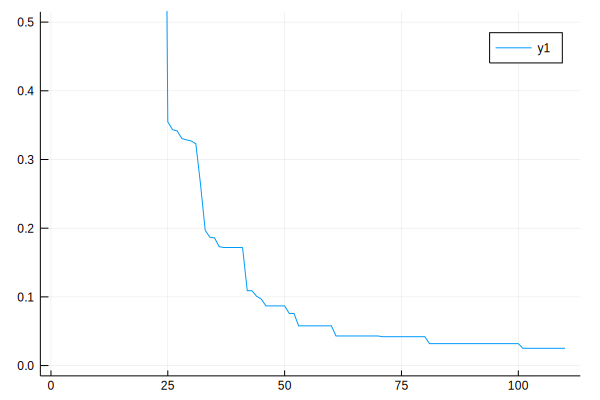

In [7]:
x = collect(1:ko_sol.N_mc)
Plots.plot(x[1:end],fdist[1:end],ylims=[0,0.5])

In [4]:
db_eps = 0.1
db_res = dbscan(full(D),db_eps,k)


Clustering.DbscanResult(Int64[], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Int64[])

In [13]:
db_res.assignments

50-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [5]:
cluster_meas = cluster_measures(ko_sol,db_res);
cluster_n = cluster_n_noise(db_res);
cluster_members = cluster_membership(ic_par[:,end],db_res,2,1);

In [8]:
cluster_members[1]

9-element Array{Float64,1}:
 1.10061
 2.10061
 3.10061
 4.10061
 5.10061
 6.10061
 7.10061
 8.10061
 9.10061

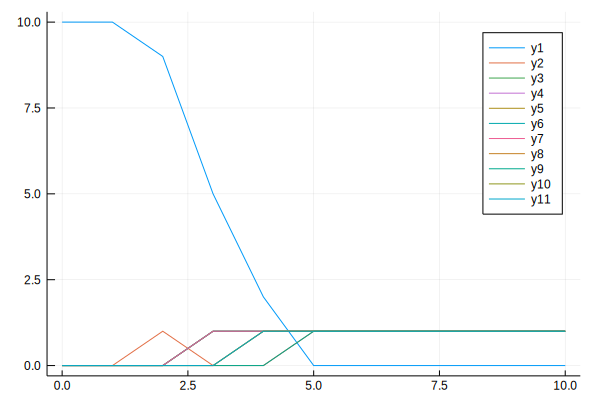

In [12]:
using Plots
plot(K_range,cluster_members)

# Example 2: Logistic Map

In [2]:
#@everywhere r = 2.5:0.05:4
@everywhere r = 3:0.05:3.1
@everywhere pars = logistic_parameters(r[1])
@everywhere ic_ranges = [0.1:0.3:0.9]
@everywhere dp = DiscreteProblem(logistic, ic_ranges[1][1], (0.,5000.), pars)
@everywhere (ic_r_prob, ic_par, N_mc) = setup_ic_par_mc_problem(dp, ic_ranges, pars, (:r, r))

In [10]:
ic_par

9×2 Array{Float64,2}:
 0.1  3.0 
 0.4  3.0 
 0.7  3.0 
 0.1  3.05
 0.4  3.05
 0.7  3.05
 0.1  3.1 
 0.4  3.1 
 0.7  3.1 

In [3]:
log_mcp = MonteCarloProblem(dp, prob_func=ic_r_prob, output_func=eval_ode_run)
tail_frac = 0.8
log_emcp = EqMCProblem(log_mcp, N_mc, tail_frac)
log_sol = solve(log_emcp)

if isdefined(:cluster)
    @save "mc_log.jld2" log_sol
end 

-------
1
-------
[0.662928, 0.670364, 0.662928, 0.670363, 0.662929, 0.670362, 0.66293, 0.670361, 0.662931, 0.67036, 0.662932, 0.670359, 0.662933, 0.670358, 0.662934, 0.670357, 0.662935, 0.670357, 0.662936, 0.670356, 0.662937, 0.670355, 0.662938, 0.670354, 0.662939, 0.670353, 0.66294, 0.670352, 0.662941, 0.670351, 0.662942, 0.67035, 0.662942, 0.670349, 0.662943, 0.670348, 0.662944, 0.670347, 0.662945, 0.670347, 0.662946, 0.670346, 0.662947, 0.670345, 0.662948, 0.670344, 0.662949, 0.670343, 0.66295, 0.670342, 0.662951, 0.670341, 0.662952, 0.67034, 0.662953, 0.670339, 0.662953, 0.670338, 0.662954, 0.670338, 0.662955, 0.670337, 0.662956, 0.670336, 0.662957, 0.670335, 0.662958, 0.670334, 0.662959, 0.670333, 0.66296, 0.670332, 0.662961, 0.670331, 0.662962, 0.67033, 0.662963, 0.67033, 0.662964, 0.670329, 0.662964, 0.670328, 0.662965, 0.670327, 0.662966, 0.670326, 0.662967, 0.670325, 0.662968, 0.670324, 0.662969, 0.670323, 0.66297, 0.670322, 0.662971, 0.670322, 0.662972, 0.670321, 0.662973, 0

-------
2
-------
[0.66293, 0.670362, 0.662931, 0.670361, 0.662932, 0.67036, 0.662933, 0.670359, 0.662933, 0.670358, 0.662934, 0.670357, 0.662935, 0.670356, 0.662936, 0.670355, 0.662937, 0.670354, 0.662938, 0.670354, 0.662939, 0.670353, 0.66294, 0.670352, 0.662941, 0.670351, 0.662942, 0.67035, 0.662943, 0.670349, 0.662944, 0.670348, 0.662945, 0.670347, 0.662946, 0.670346, 0.662946, 0.670345, 0.662947, 0.670344, 0.662948, 0.670344, 0.662949, 0.670343, 0.66295, 0.670342, 0.662951, 0.670341, 0.662952, 0.67034, 0.662953, 0.670339, 0.662954, 0.670338, 0.662955, 0.670337, 0.662956, 0.670336, 0.662957, 0.670335, 0.662957, 0.670335, 0.662958, 0.670334, 0.662959, 0.670333, 0.66296, 0.670332, 0.662961, 0.670331, 0.662962, 0.67033, 0.662963, 0.670329, 0.662964, 0.670328, 0.662965, 0.670327, 0.662966, 0.670327, 0.662967, 0.670326, 0.662967, 0.670325, 0.662968, 0.670324, 0.662969, 0.670323, 0.66297, 0.670322, 0.662971, 0.670321, 0.662972, 0.67032, 0.662973, 0.67032, 0.662974, 0.670319, 0.662975, 0.

[0.670349, 0.662943, 0.670348, 0.662944, 0.670348, 0.662945, 0.670347, 0.662946, 0.670346, 0.662947, 0.670345, 0.662948, 0.670344, 0.662949, 0.670343, 0.66295, 0.670342, 0.662951, 0.670341, 0.662952, 0.67034, 0.662953, 0.670339, 0.662953, 0.670339, 0.662954, 0.670338, 0.662955, 0.670337, 0.662956, 0.670336, 0.662957, 0.670335, 0.662958, 0.670334, 0.662959, 0.670333, 0.66296, 0.670332, 0.662961, 0.670331, 0.662962, 0.67033, 0.662963, 0.67033, 0.662963, 0.670329, 0.662964, 0.670328, 0.662965, 0.670327, 0.662966, 0.670326, 0.662967, 0.670325, 0.662968, 0.670324, 0.662969, 0.670323, 0.66297, 0.670323, 0.662971, 0.670322, 0.662972, 0.670321, 0.662973, 0.67032, 0.662973, 0.670319, 0.662974, 0.670318, 0.662975, 0.670317, 0.662976, 0.670316, 0.662977, 0.670315, 0.662978, 0.670315, 0.662979, 0.670314, 0.66298, 0.670313, 0.662981, 0.670312, 0.662982, 0.670311, 0.662982, 0.67031, 0.662983, 0.670309, 0.662984, 0.670308, 0.662985, 0.670308, 0.662986, 0.670307, 0.662987, 0.670306, 0.662988, 0.670305

 0.669989, 0.663311, 0.669988, 0.663312, 0.669988, 0.663313, 0.669987, 0.663313, 0.669986, 0.663314, 0.669986, 0.663315, 0.669985, 0.663315, 0.669984, 0.663316, 0.669984, 0.663317, 0.669983, 0.663317, 0.669982, 0.663318, 0.669982, 0.663319, 0.669981, 0.663319, 0.66998, 0.66332, 0.66998, 0.663321, 0.669979, 0.663321, 0.669978, 0.663322, 0.669978, 0.663323, 0.669977, 0.663323, 0.669976, 0.663324, 0.669976, 0.663325, 0.669975, 0.663325, 0.669974, 0.663326, 0.669974, 0.663327, 0.669973, 0.663327, 0.669972, 0.663328, 0.669972, 0.663329, 0.669971, 0.663329, 0.66997, 0.66333, 0.66997, 0.663331, 0.669969, 0.663331, 0.669968, 0.663332, 0.669968, 0.663333, 0.669967, 0.663333, 0.669967]
-------
4
-------
[0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.7377

-------
5
-------
[0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0

[0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164,

-------
7
-------


[0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567,

[0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567,

[0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014,

 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567, 0.558014, 0.764567]


In [9]:
using StatsBase
mean_and_std([0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164])

(0.6638608031968044, 0.07380733920329491)

In [4]:
log_sol.sol.u

9-element Array{NTuple{4,Array{Float64,1}},1}:
 ([0.666645], [0.00351551], [1.91557], [0.99174]) 
 ([0.666645], [0.00351368], [1.9166], [0.991749]) 
 ([0.666652], [0.00350268], [1.92285], [0.991802])
 ([0.663861], [0.0738073], [-0.15934], [1.0])     
 ([0.663861], [0.0738073], [-0.15934], [1.0])     
 ([0.664008], [0.0738073], [-0.159337], [1.0])    
 ([0.661187], [0.103328], [-0.15934], [1.0])      
 ([0.661187], [0.103328], [-0.15934], [1.0])      
 ([0.661393], [0.103328], [-0.159337], [1.0])     

In [ ]:
@load "mc_log.jld2" log_sol

In [4]:
D = @time distance_matrix(log_sol, ic_par[:,2]);
k = 4
fdist = @time k_dist(D,k);

if isdefined(:cluster)
    @save "mc_log_d.jld2" D
end

LoadError: [91mMethodError: no method matching (::##51#52)(::NTuple{4,Array{Float64,1}}, ::NTuple{4,Array{Float64,1}}, ::Float64, ::Float64)[0m
Closest candidates are:
  #51(::Any, ::Any) at In[4]:1[39m

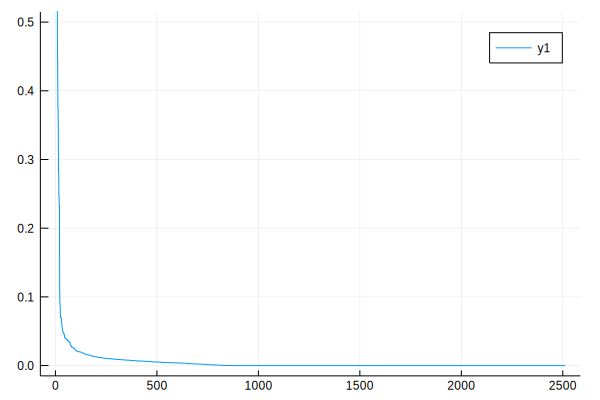

In [61]:
x = collect(1:log_sol.N_mc)
Plots.plot(x[1:end],fdist[1:end],ylims=[0,0.5])

In [62]:
db_eps = 0.05

0.05

In [64]:
db_res = dbscan(full(D),db_eps,k)


Clustering.DbscanResult([1, 730, 811, 814, 892, 1297, 1378, 1459, 1540, 1558  …  1702, 1783, 1864, 1945, 2026, 2189, 2209, 2248, 2270, 2431], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  21, 21, 21, 21, 21, 21, 21, 21, 21, 21], [729, 81, 75, 4, 405, 81, 81, 81, 65, 6  …  81, 81, 81, 80, 161, 55, 13, 4, 161, 77])

In [65]:
cluster_meas = cluster_measures(log_sol,db_res);
cluster_n = cluster_n_noise(db_res);
cluster_members = cluster_membership(ic_par[:,end],db_res);

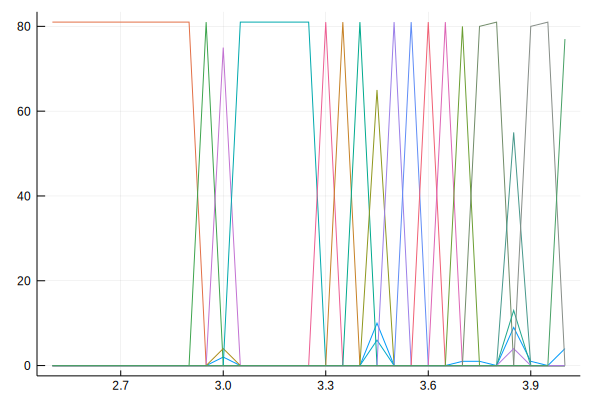

In [66]:
using Plots
plot(r,cluster_members,legend=false)

In [6]:
ic_par[890:900,end]

11-element Array{Float64,1}:
 3.0 
 3.0 
 3.05
 3.05
 3.05
 3.05
 3.05
 3.05
 3.05
 3.05
 3.05

In [6]:
log_sol.sol.u[890:900]

11-element Array{NTuple{4,Array{Float64,1}},1}:
 ([0.666645], [0.00350825], [1.91967], [0.991775])
 ([0.666645], [0.00351551], [1.91557], [0.99174]) 
 ([0.663861], [0.0738073], [-0.15934], [1.0])     
 ([0.663861], [0.0738073], [-0.15934], [1.0])     
 ([0.663861], [0.0738073], [-0.15934], [1.0])     
 ([0.664008], [0.0738073], [-0.159337], [1.0])    
 ([0.664008], [0.0738073], [-0.159337], [1.0])    
 ([0.664008], [0.0738073], [-0.159337], [1.0])    
 ([0.664008], [0.0738073], [-0.159337], [1.0])    
 ([0.664008], [0.0738073], [-0.159337], [1.0])    
 ([0.664008], [0.0738073], [-0.159337], [1.0])    

In [3]:
soli=solve(ic_r_prob(dp, 893, false));
#eval_ode_run(soli, 893)
tail = soli[1,4000:5000]
#using StatsBase
#v = var(tail)


1001-element Array{Float64,1}:
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705
 ⋮       
 0.590164
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705
 0.590164
 0.737705

In [5]:
eval_ode_run(soli,893)

[0.298595, 0.63878, 0.703757, 0.635873, 0.706193, 0.632828, 0.708688, 0.62967, 0.711216, 0.626433, 0.713745, 0.623155, 0.71624, 0.619882, 0.718666, 0.616665, 0.720987, 0.613552, 0.723173, 0.610591, 0.725197, 0.607823, 0.727042, 0.605279, 0.728695, 0.602981, 0.730155, 0.600938, 0.731425, 0.599149, 0.732517, 0.597605, 0.733444, 0.596288, 0.734223, 0.595176, 0.734871, 0.594248, 0.735408, 0.593479, 0.735848, 0.592845, 0.736208, 0.592327, 0.736501, 0.591906, 0.736738, 0.591563, 0.736929, 0.591287, 0.737083, 0.591064, 0.737207, 0.590884, 0.737307, 0.59074, 0.737387, 0.590625, 0.737451, 0.590532, 0.737502, 0.590458, 0.737543, 0.590399, 0.737576, 0.590351, 0.737602, 0.590314, 0.737623, 0.590283, 0.737639, 0.590259, 0.737652, 0.59024, 0.737663, 0.590225, 0.737672, 0.590212, 0.737678, 0.590203, 0.737684, 0.590195, 0.737688, 0.590188, 0.737691, 0.590184, 0.737694, 0.59018, 0.737696, 0.590176, 0.737698, 0.590174, 0.737699, 0.590172, 0.737701, 0.59017, 0.737701, 0.590169, 0.737702, 0.590168, 0.7377

 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164,

 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705,

 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164,

 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164, 0.737705, 0.590164,

(([0.663879], [0.0738303], [32.983], [0.871747]), false)

In [ ]:
tsave_array()

In [26]:
empirical_1D_KL_divergence(tail,0.664008,0.00544)

46.430647468454666

In [79]:
log_sol.sol.u[800:900]

101-element Array{NTuple{4,Array{Float64,1}},1}:
 ([0.661017], [1.94221e-15], [0.0], [1.0])        
 ([0.661017], [1.94221e-15], [0.0], [1.0])        
 ([0.661017], [1.94221e-15], [0.0], [1.0])        
 ([0.661017], [1.94221e-15], [0.0], [1.0])        
 ([0.661017], [1.94221e-15], [0.0], [1.0])        
 ([0.661017], [1.94221e-15], [0.0], [1.0])        
 ([0.661017], [1.94221e-15], [0.0], [1.0])        
 ([0.661017], [1.94392e-15], [0.0], [1.0])        
 ([0.661017], [1.94392e-15], [0.0], [1.0])        
 ([0.661017], [1.94392e-15], [0.0], [1.0])        
 ([0.661017], [1.94392e-15], [0.0], [1.0])        
 ([0.666645], [0.00351551], [1.91557], [0.99174]) 
 ([0.666645], [0.00350825], [1.91967], [0.991775])
 ⋮                                                
 ([0.666645], [0.00344767], [1.95428], [0.992064])
 ([0.666645], [0.00350825], [1.91967], [0.991775])
 ([0.666645], [0.00351551], [1.91557], [0.99174]) 
 ([0.663861], [0.0738073], [-0.15934], [1.0])     
 ([0.663861], [0.0738073], [-0.15

In [77]:
ic_par[850,:]

2-element Array{Float64,1}:
 0.49
 3.0 

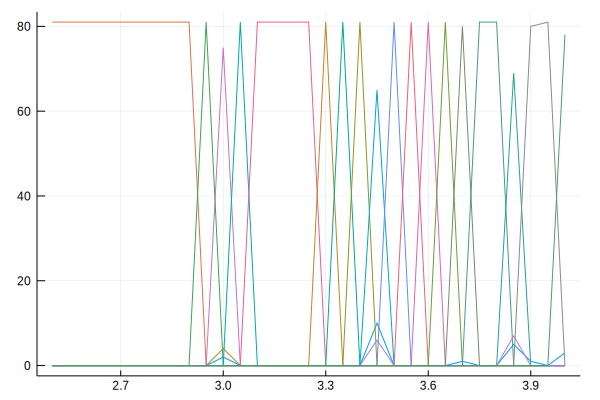

In [58]:
using Plots
plot(r,cluster_members,legend=false)

In [57]:
cluster_meas[4,:,:]

4×1 Array{Float64,2}:
 0.0199118 
 0.00010471
 0.0573831 
 0.0296233 

# Example 3: Roessler Network

In [10]:
@everywhere N = 5

@everywhere k = 2
@everywhere p = 0.2
@everywhere net = watts_strogatz(N, k, p)

#@everywhere A = [0 1 1 
#    1 0 1 
#    1 1 0 ]
#@everywhere net = Graph(A)

@everywhere L = laplacian_matrix(net)

@everywhere a = ones(N).*0.2
@everywhere b = ones(N).*0.2
@everywhere c = ones(N).*7.0

tail_frac = 0.8

# for reference get the synchronizable range of Ks
evals = eig(full(L))[1]
evals = sort!(evals[evals .> 1e-5])
lambda_min = evals[end]
lambda_max = evals[1]
K_sync = (0.1232/lambda_min, 4.663/lambda_max)

(0.034051642517202586, 3.374178497908152)

In [11]:
#@everywhere K_range = [0.002, 0.004, 0.006, 0.008, 0.010, 0.03, 0.05, 0.1, 0.2, 0.5, 1, 2, 4]
@everywhere K_range = [0.002, 0.004, 0.03, 0.5, 1, 4]
#@everywhere K_range = [0.002, 0.005, 0.01, 0.025, 0.05, 0.07, 0.5, 1, 2]
#@everywhere K_range = [0.005, 0.007, 0.009, 0.011, 0.013, 0.016, 0.02, 0.03, 0.04, 0.9, 1.5, 2]
@everywhere ic_gen_xy = Uniform(-15.,15.)
@everywhere ic_gen_z = Uniform(-5.,20.)

@everywhere ic_gens = [()->rand(ic_gen_xy), ()-> rand(ic_gen_xy), ()->rand(ic_gen_z)]
@everywhere N_ic = 5


@everywhere rp = ODEProblem(roessler_network, zeros(3*N), (0.,100.), roessler_parameters(a,b,c,0.05,L,N))
@everywhere (ic_coupling_problem, ic_par, N_mc) = setup_ic_par_mc_problem(rp, ic_gens, N_ic, roessler_parameters(a,b,c,0.05,L,N),(:K,K_range))


In [5]:
rn_mcp = MonteCarloProblem(rp, prob_func=ic_coupling_problem, output_func=eval_ode_run_inf)
rn_emcp = EqMCProblem(rn_mcp, N_mc, tail_frac)
@time rn_sol = solve(rn_emcp)

@save "mc_roes_sol.jld2" rn_sol ic_par rn_emcp

if isdefined(:cluster)
    @save "mc_roes_sol.jld2" rn_sol ic_par rn_emcp
end 

  5.997917 seconds (35.68 M allocations: 865.371 MiB, 3.45% gc time)


In [2]:
@load "mc_roes_sol.jld2" rn_sol ic_par rn_empc
#@load "mc_roes_ic_par_inf.jld2" ic_par

LoadError: [91mKeyError: key "rn_empc" not found[39m

In [ ]:
D = distance_matrix(rn_sol);
k = 4
fdist = k_dist(D,k);

In [ ]:
x = collect(1:rn_sol.N_mc)
Plots.plot(x[1:end],fdist[1:end])

In [ ]:
eps = 6e8
db_res = dbscan(D,eps,k)
cluster_meas = cluster_measures(rn_sol, db_res)

# Example 4: Lotka Volterra

High Dimensional (N>=4) Lotka Volterra system can exhibit all kinds of interessting dynamics. Maybe it makes sense to study them with these tools

First we study the 4-dim model: $\frac{dN_i}{dt} = b_iN_i\left(1-\sum_{j=1}^n a_{ij}N_j\right),\qquad 1\leq i\leq n$

The parameter configuration

$ a = \left[ \begin{array}{cccc}
        1 & 1.09 & 1.52 & 0\\
        0 & 1 & 0.44 & 1.36\\
        2.33 & 0 & 1 & 0.47\\
        1.21 & 0.51 & 0.35 & 1\\
        \end{array} \right] $
        
$ b = \left(1, 0.72, 1.53, 1.27\right)$

is known to exhibit chaos with a strange attractor. Lets scan around these parameters.

In [9]:
@everywhere N = 4

@everywhere a = [1 1.09 1.52 0
                 0 1 0.44 1.36
                 2.33 0 1 0.47
                 1.21 0.51 0.35 1
                ]
@everywhere b = [1, 0.72, 1.53, 1.27]

@everywhere a12 = 0.69:0.1:2.59
@everywhere var_a = [a for i=1:length(a12)]
for i=1:length(a12)
        var_a[i][1,2] = a12[i]
end 

tail_frac = 0.8
@everywhere ic_gen = Uniform(-0.99,0.99)

@everywhere ic_gens = [()->rand(ic_gen)]
@everywhere N_ic = 100

@everywhere lvp = ODEProblem(lotka_volterra, zeros(N), (0.,100.), lotka_volterra_parameters(a,b,N))
@everywhere (ic_a_problem, ic_par, N_mc) = setup_ic_par_mc_problem(lvp, ic_gens, N_ic, lotka_volterra_parameters(a,b,N),(:a,var_a))


LoadError: [91m[91m[91mUndefVarError: Uniform not defined[39m
eval(::Module, ::Any) at ./boot.jl:235
eval_ew_expr at ./distributed/macros.jl:116 [inlined]
(::Base.Distributed.##135#136{Base.Distributed.#eval_ew_expr,Tuple{Expr},Array{Any,1}})() at ./distributed/remotecall.jl:319
run_work_thunk(::Base.Distributed.##135#136{Base.Distributed.#eval_ew_expr,Tuple{Expr},Array{Any,1}}, ::Bool) at ./distributed/process_messages.jl:56
#remotecall_fetch#140(::Array{Any,1}, ::Function, ::Function, ::Base.Distributed.LocalProcess, ::Expr, ::Vararg{Expr,N} where N) at ./distributed/remotecall.jl:344
remotecall_fetch(::Function, ::Base.Distributed.LocalProcess, ::Expr, ::Vararg{Expr,N} where N) at ./distributed/remotecall.jl:344
#remotecall_fetch#144(::Array{Any,1}, ::Function, ::Function, ::Int64, ::Expr, ::Vararg{Expr,N} where N) at ./distributed/remotecall.jl:372
remotecall_fetch(::Function, ::Int64, ::Expr, ::Vararg{Expr,N} where N) at ./distributed/remotecall.jl:372
(::##85#87)() at ./distributed/macros.jl:102[39m
#remotecall_fetch#140(::Array{Any,1}, ::Function, ::Function, ::Base.Distributed.LocalProcess, ::Expr, ::Vararg{Expr,N} where N) at ./distributed/remotecall.jl:345
remotecall_fetch(::Function, ::Base.Distributed.LocalProcess, ::Expr, ::Vararg{Expr,N} where N) at ./distributed/remotecall.jl:344
#remotecall_fetch#144(::Array{Any,1}, ::Function, ::Function, ::Int64, ::Expr, ::Vararg{Expr,N} where N) at ./distributed/remotecall.jl:372
remotecall_fetch(::Function, ::Int64, ::Expr, ::Vararg{Expr,N} where N) at ./distributed/remotecall.jl:372
(::##85#87)() at ./distributed/macros.jl:102[39m

In [8]:
lvp_mcp = MonteCarloProblem(lvp, prob_func=ic_a_problem, output_func=eval_ode_run_repeat)
lvp_emcp = EqMCProblem(lvp_mcp, N_mc, tail_frac)
@time lvp_sol = solve(lvp_emcp)

if isdefined(:cluster)
    @save "mc_lv_sol.jld2" lvp_sol
    @save "mc_lv_ic_par.jld2" ic_par
end 

4×4 Array{Float64,2}:
 1.0   2.59  1.52  0.0 
 0.0   1.0   0.44  1.36
 2.33  0.0   1.0   0.47
 1.21  0.51  0.35  1.0 

# Example 5: Henon Map

In [ ]:
@everywhere a = 2.5:0.02:4
@everywhere pars = henon_parameters(1,1)
@everywhere ic_ranges = [0.1:0.005:0.9]
@everywhere hmp = DiscreteProblem(henon, ic_ranges[1][1], (0.,500.), pars)
@everywhere (ic_r_prob, ic_par, N_mc) = setup_ic_par_mc_problem(hmp, ic_ranges, pars, (:a, a))

hm_mcp = MonteCarloProblem(dp, prob_func=ic_r_prob, output_func=eval_ode_run)
tail_frac = 0.8
hm_emcp = EqMCProblem(hm_mcp, N_mc, tail_frac)
hm_sol = solve(hm_emcp)

if isdefined(:cluster)
    @save "mc_log.jld2" hm_sol
end 